# Analysis of Detroit's Crime Data





Detroit has a long-standing reputation for having one of the highest crime rates in the United States and it often ranks the most unsafe city in the country. This city, which was once a booming hub of industry and innovation, has faced numerous challenges that have contributed to its struggles with crime. Historically, Detroit's crime statistics have positioned it as safer than only a small fraction of cities across the country, creating a persistent perception of danger that has been hard to shake. 

Despite this sobering reality, it is essential to recognize that Detroit is not merely a story of decline; it is a city in transition, actively working to rejuvenate its neighborhoods and reclaim its reputation. Over the past several years, city officials, community leaders, and residents have come together to implement a range of initiatives aimed at reducing crime and fostering a sense of security throughout the diverse communities within Detroit.

At the heart of the exploration into this multifaceted issue lies a comprehensive analysis of crime data, meticulously sourced from the City of Detroit Open Data Portal. This dataset is particularly rich and diverse, containing a plethora of features that can yield valuable insights into the intricate dynamics of crime within the city. For example, it includes information on council districts, which can provide context regarding specific areas of concern, as well as neighborhood designations that help to pinpoint where incidents are occurring. 

## Table of Contents: 

A. Cleaning up and Preparing the Dataset for analysis

B. Visualizing and Recognizing Trends present in the dataset
- i. Types and Frequencies of Crimes
- ii. Time at which Crimes are committed
- iii. Crime Trends Across Various Neighborhoods and Council Districts of Detroit
- iv. Examining Dangerous Drugs, Aggravated Assault, Sex Offenses, and Homicide Across Council Districts of Detroit

C. Hypothesis Testing

D. Summary and Conclusion


## A. Cleaning up and Preparing the Dataset for analysis


In [133]:
#importing in the required modules

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
#loading in the dataset
crime_dataset = pd.read_csv('/Users/abhinavnallamilli/Desktop/Data Bootcamp/Midterm Project/RMS_Crime_Incidents.csv')

/var/folders/v2/xycpl7857l380vg682w9mqqh0000gn/T/ipykernel_20610/1185147951.py:2: DtypeWarning: Columns (7,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_dataset = pd.read_csv('/Users/abhinavnallamilli/Desktop/Data Bootcamp/Midterm Project/RMS_Crime_Incidents.csv')


In [135]:
#examining the columns that are present in the dataframe
crime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660141 entries, 0 to 660140
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   X                        659685 non-null  float64
 1   Y                        659685 non-null  float64
 2   incident_entry_id        660141 non-null  object 
 3   nearest_intersection     659685 non-null  object 
 4   offense_category         660141 non-null  object 
 5   offense_description      660141 non-null  object 
 6   state_offense_code       660141 non-null  int64  
 7   arrest_charge            660141 non-null  object 
 8   charge_description       660141 non-null  object 
 9   incident_occurred_at     660141 non-null  object 
 10  incident_time            660141 non-null  object 
 11  incident_day_of_week     660141 non-null  int64  
 12  incident_hour_of_day     660141 non-null  int64  
 13  incident_year            660141 non-null  int64  
 14  case

In [136]:
#checking the head of the datatframe
crime_dataset.head()

,X,Y,incident_entry_id,nearest_intersection,offense_category,offense_description,state_offense_code,arrest_charge,charge_description,incident_occurred_at,...,report_number,scout_car_area,police_precinct,census_block_2020_geoid,neighborhood,council_district,zip_code,longitude,latitude,ESRI_OID
0,-83.050895,42.336989,1115244-5301,E Adams Ave & Woodward Ave,DISORDERLY CONDUCT,DISORDERLY CONDUCT - GENERAL,5301,53001,DISORDERLY CONDUCT - GENERAL,2024/04/22 02:47:00+00,...,2404210313,0311,03,2.616352e+14,Downtown,6.0,48226.0,-83.050895,42.336989,1
1,-83.227609,42.367286,169685-1301,Orangelawn St & Warwick St,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2018/01/21 02:15:00+00,...,1801200304,0607,06,2.616355e+14,Franklin Park,7.0,48228.0,-83.227609,42.367286,2
2,-82.945207,42.406690,137602-1301,E Outer Dr & Devonshire Rd,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2017/10/29 13:30:00+00,...,1710290145,0504,05,2.616350e+14,Morningside,4.0,48224.0,-82.945207,42.406690,3
3,-83.166525,42.358760,1195058-1302,Joy Rd & Manor,AGGRAVATED ASSAULT,AGGRAVATED / FELONIOUS ASSAULT,1302,13002,AGGRAVATED / FELONIOUS ASSAULT ...,2024/10/13 02:53:00+00,...,2410130002,0208,02,2.616354e+14,Aviation Sub,7.0,48204.0,-83.166525,42.358760,4
4,-83.270972,42.422054,1195061-1301,Codding St & Grand River Ave,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT ...,2024/10/13 12:17:00+00,...,2410130090,0805,08,2.616354e+14,Seven Mile-Rouge,1.0,48219.0,-83.270972,42.422054,5


In [137]:
#checking the tail of the dataframe
crime_dataset.tail()

,X,Y,incident_entry_id,nearest_intersection,offense_category,offense_description,state_offense_code,arrest_charge,charge_description,incident_occurred_at,...,report_number,scout_car_area,police_precinct,census_block_2020_geoid,neighborhood,council_district,zip_code,longitude,latitude,ESRI_OID
660136,-83.061793,42.328965,1006070-1301,Brooklyn St & Porter St,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT ...,2023/08/13 08:42:00+00,...,2308130079,310,3,2.616352e+14,Corktown,6.0,48216.0,-83.061793,42.328965,660137
660137,-83.182347,42.372958,794981-5701,Plymouth Rd & Shirley Ave,OTHER,TRESPASS,5701,57001,TRESPASS,2022/04/02 00:43:00+00,...,2204010375,204,2,2.616354e+14,Paveway,7.0,48227.0,-83.182347,42.372958,660138
660138,-83.115534,42.331156,1111764-1302,Wesson St & Michigan Ave,AGGRAVATED ASSAULT,AGGRAVATED / FELONIOUS ASSAULT,1302,13002,AGGRAVATED / FELONIOUS ASSAULT ...,2024/04/13 21:15:00+00,...,2404130230,406,4,2.616353e+14,Chadsey Condon,6.0,48210.0,-83.115534,42.331156,660139
660139,-82.989161,42.417660,931693-2601,Racine St & Gratiot Ave,FRAUD,FRAUD - FALSE PRETENSE / SWINDLE / CONFIDENCE ...,2601,26001,FRAUD - FALSE PRETENSE / SWINDLE / CONFIDENCE ...,2023/02/27 19:58:00+00,...,2302270270,909,9,2.616350e+14,Eden Gardens,4.0,48205.0,-82.989161,42.417660,660140
660140,-82.998971,42.445446,811822-1301,Bringard Dr & Strasburg St,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2022/05/12 22:49:00+00,...,2205120348,901,9,2.616350e+14,Conner Creek,3.0,48205.0,-82.998971,42.445446,660141


In [138]:
#converting "incident_occurred_at" and "incident_time" to datetime format
crime_dataset['incident_occurred_at'] = pd.to_datetime(crime_dataset['incident_occurred_at'])

In [139]:
#checking the timeline of incidents that are recorded in the dataset
crime_dataset['incident_year'].value_counts()

incident_year
2023    90315
2019    85320
2022    83697
2018    83573
2017    83058
2020    78997
2021    78843
2024    68061
2016     6334
2015      440
2014      311
2013      236
2012      179
2010      133
2011      132
2008       66
2009       64
2002       52
2007       49
2000       45
2001       40
2004       29
2006       24
2005       21
2003       20
1995       10
1991        8
1999        7
1989        5
1994        5
1978        5
1980        4
1986        4
1993        4
1977        4
1997        4
1998        3
1983        3
1976        3
1979        3
1996        3
1990        2
1985        2
1988        2
1984        2
1920        2
1923        2
1992        2
1918        2
1915        2
1973        2
1961        1
1987        1
1974        1
1963        1
1951        1
1921        1
1981        1
Name: count, dtype: int64

Eventhough the data goes back to the 1980s, there are not a lot of cases that have been recorded probably due to data not being digitalized or a change in the method of collection. During analysis, this might result in a outliers on the graphs so it is better to drop these years and focus on the reports from 2016

In [140]:
#dropping the years before 2015
crime_dataset = crime_dataset[crime_dataset['incident_year'] > 2015]

In [141]:
#check the number of rows remaining
print("Number of rows remaining: " + str(len(crime_dataset)))

Number of rows remaining: 658198


In [142]:
#Since there is no separate month column, I think we should create one
crime_dataset['month'] = pd.DatetimeIndex(crime_dataset['incident_occurred_at']).month

In [143]:
#final check to see if everything is in place
crime_dataset.describe()


,X,Y,state_offense_code,incident_day_of_week,incident_hour_of_day,incident_year,case_id,crime_id,report_number,census_block_2020_geoid,council_district,zip_code,longitude,latitude,ESRI_OID,month
count,657743.000000,657743.000000,658198.000000,658198.000000,658198.000000,658198.000000,6.581980e+05,6.581980e+05,6.581980e+05,6.558570e+05,652022.000000,652658.000000,657743.000000,657743.000000,658198.000000,658198.000000
mean,-83.107949,42.389917,2393.275056,4.012539,12.615216,2020.398740,5.684371e+05,3.568437e+06,2.048861e+09,2.616353e+14,3.996581,48219.005355,-83.107949,42.389917,329915.537262,6.577282
std,0.097617,0.038128,1143.259219,1.991458,7.121424,2.299144,3.172684e+05,3.172684e+05,2.295645e+08,3.868895e+08,2.028281,11.345238,0.097617,0.038128,190521.622937,3.334617
min,-83.311156,42.225981,901.000000,1.000000,0.000000,2016.000000,4.000000e+00,3.000004e+06,4.000000e+00,2.616350e+14,1.000000,48201.000000,-83.311156,42.225981,1.000000,1.000000
25%,-83.193536,42.359201,1302.000000,2.000000,7.000000,2018.000000,2.968302e+05,3.296830e+06,1.812030e+09,2.616351e+14,2.000000,48208.000000,-83.193536,42.359201,164922.250000,4.000000
50%,-83.116761,42.394644,2306.000000,4.000000,14.000000,2020.000000,5.744655e+05,3.574466e+06,2.012020e+09,2.616353e+14,4.000000,48219.000000,-83.116761,42.394644,329870.500000,7.000000
75%,-83.027479,42.422648,2900.000000,6.000000,19.000000,2022.000000,8.438258e+05,3.843826e+06,2.212130e+09,2.616354e+14,6.000000,48228.000000,-83.027479,42.422648,494859.750000,9.000000
max,-82.880609,42.470321,9915.000000,7.000000,23.000000,2024.000000,1.106506e+06,4.106506e+06,2.607020e+09,2.616399e+14,7.000000,48243.000000,-82.880609,42.470321,660141.000000,12.000000


## B. Visualizing and Recognizing Trends present in the dataset

#### i. Types and Frequencies of Crimes

In [144]:
#listing of unique values and their respective counts
crime_dataset['offense_category'].value_counts()

offense_category
ASSAULT                   120365
LARCENY                    97674
DAMAGE TO PROPERTY         86271
AGGRAVATED ASSAULT         66312
STOLEN VEHICLE             59309
FRAUD                      53774
BURGLARY                   48867
WEAPONS OFFENSES           24491
ROBBERY                    14547
STOLEN PROPERTY            14181
DANGEROUS DRUGS            11741
SEX OFFENSES                8672
OBSTRUCTING JUDICIARY       8608
OBSTRUCTING THE POLICE      7792
SEXUAL ASSAULT              5507
ARSON                       5035
RUNAWAY                     4208
OUIL                        3912
FAMILY OFFENSE              3633
MISCELLANEOUS               2336
HOMICIDE                    2212
OTHER                       2191
DISORDERLY CONDUCT          2147
FORGERY                     1725
KIDNAPPING                  1485
LIQUOR                       573
EXTORTION                    397
JUSTIFIABLE HOMICIDE         175
SOLICITATION                  45
GAMBLING                  

Text(0, 0.5, 'Category of Crimes Committed')

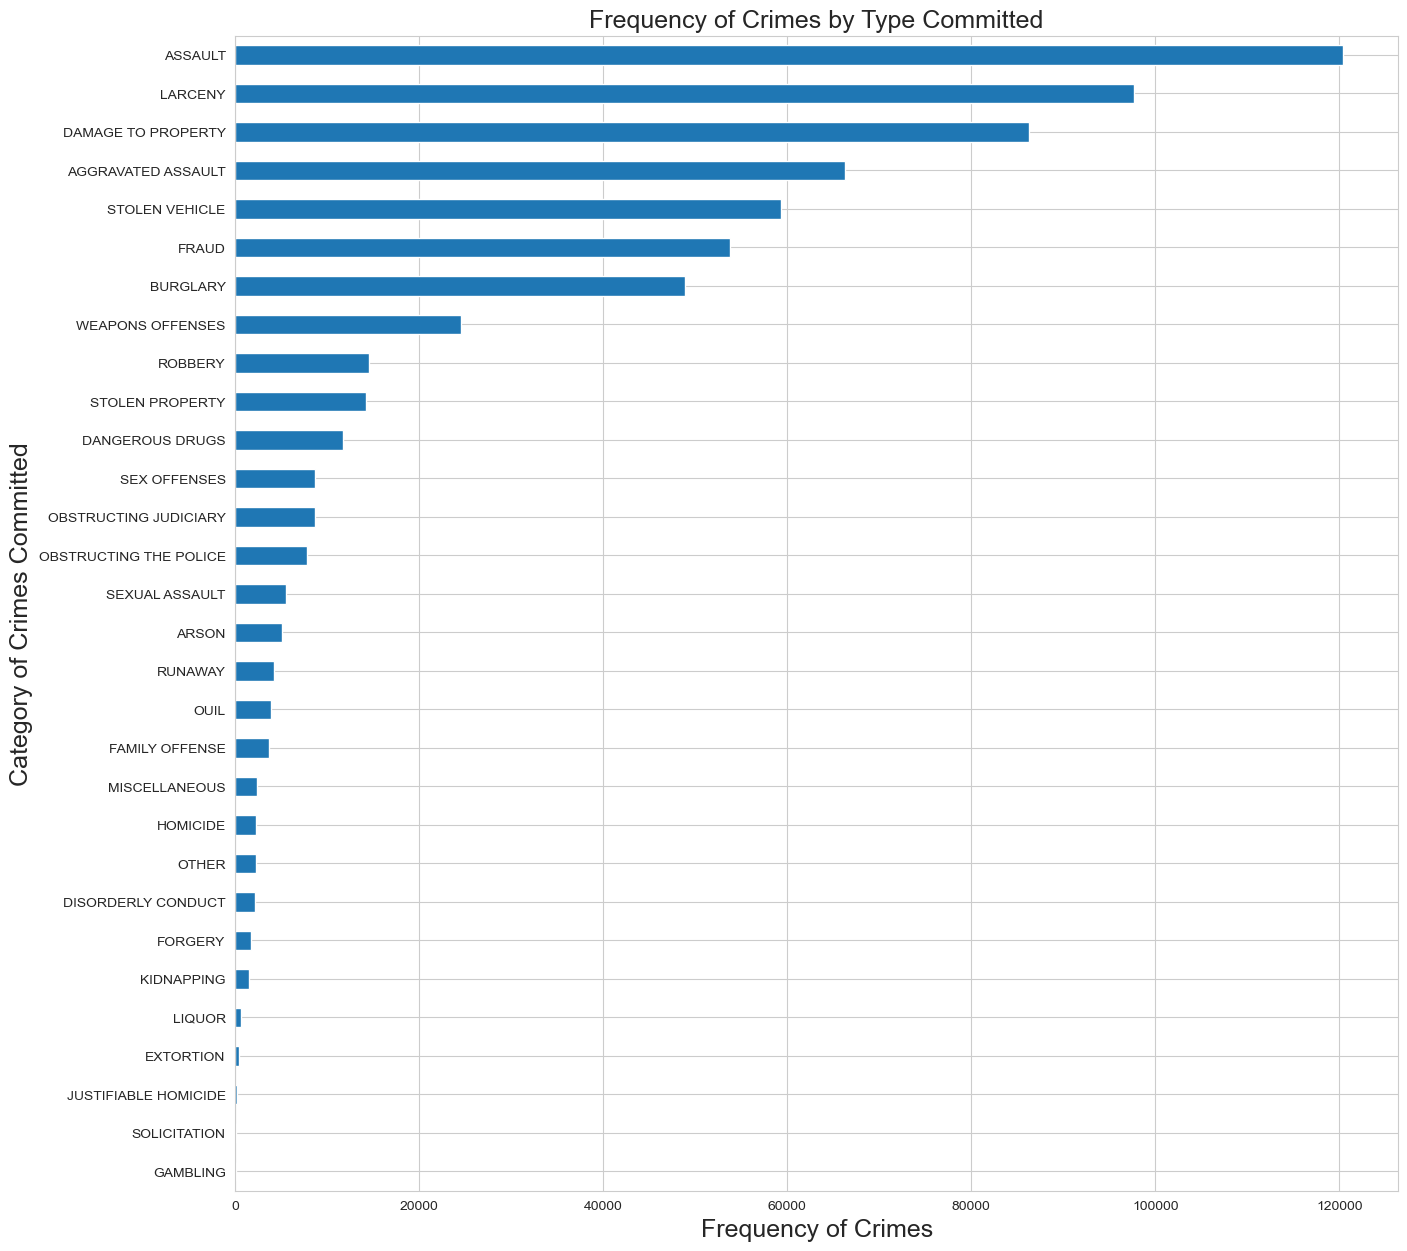

In [145]:
#plotting histogram for the various categories of offenses
fig = plt.figure(figsize = (15, 15))
ax = crime_dataset['offense_category'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Frequency of Crimes by Type Committed", fontsize = 18)
plt.xlabel("Frequency of Crimes", fontsize = 18)
plt.ylabel("Category of Crimes Committed", fontsize = 18)

From the data presented above, we can infer that a significant portion of the recorded crimes are related to specific offenses such as assault, larceny, damage to property, aggravated assault, and stolen vehicles. These categories collectively comprise a considerable portion of the overall crime landscape, highlighting areas of concern that may require focused attention from law enforcement and community resources.

In fact, the top five categories of crime account for a striking 65% of the total recorded offenses, demonstrating that a relatively small number of offense types contribute substantially to the overall crime rates. This concentration of crime within these specific categories suggests potential targets for intervention strategies aimed at reducing overall crime levels. 

The remaining 35% of the crimes are distributed among various other categories. While these offenses may be less frequent, they still warrant consideration in the broader context of public safety and crime prevention efforts. Understanding the distribution of crimes can aid in developing comprehensive strategies that address not only the most prevalent offenses but also the more infrequent ones that nonetheless impact community safety and well-being. By prioritizing resources effectively, agencies can work towards creating safer environments for all residents.

### ii. Time at which Crimes are committed

Text(0, 0.5, 'Frequency of Crimes')

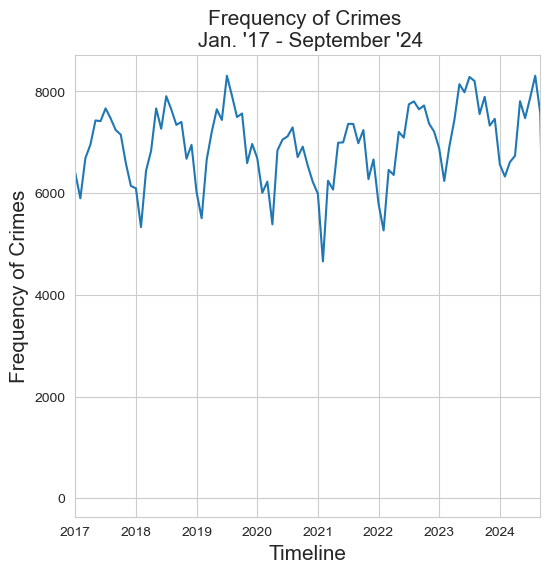

In [146]:
#plotting overall time trend through April of 2024
fig, ax = plt.subplots(figsize=(6,6))
plot_data = crime_dataset.groupby(pd.Grouper(key='incident_occurred_at', freq='ME')).count()['report_number']
ax = plot_data.plot(ax=ax)
ax.set_xlim(['2017-01-01' , '2024-09-30'])
plt.title("Frequency of Crimes \n Jan. '17 - September '24", fontsize = 15)
plt.xlabel("Timeline", fontsize = 15)
plt.ylabel("Frequency of Crimes", fontsize = 15)

The crime rate in Detroit has experienced significant fluctuation, with a noticeable upward trend over the past few years. This increase raises important concerns about public safety and may reflect various underlying factors influencing criminal activity in the area. As these fluctuations continue, understanding the drivers behind the changing crime rate will be crucial for implementing effective crime prevention strategies and improving community safety.
Now, taking a peek at the crime rate across the months of the year and days of the week. 

In [147]:
crime_dataset['month'].value_counts()


month
7     62350
8     62113
5     59787
6     58802
9     58648
10    54897
4     53032
12    52703
3     52310
1     50574
11    47691
2     45291
Name: count, dtype: int64

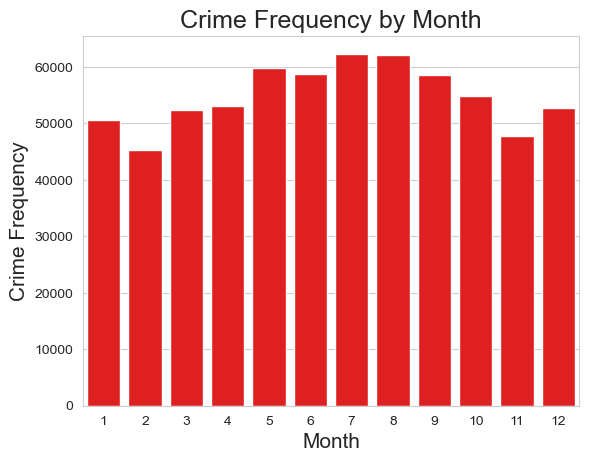

In [148]:
crime_counts_by_month = crime_dataset['month'].value_counts().reset_index()
crime_counts_by_month.columns = ['month', 'count']
sns.barplot(x='month', y='count', data=crime_counts_by_month, color='red')
plt.title('Crime Frequency by Month', fontsize=18)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Crime Frequency', fontsize=15)
plt.show()


In [149]:
# grabbing total crime counts for each day
d1=(crime_dataset['incident_day_of_week'] == 1).sum()
d2=(crime_dataset['incident_day_of_week'] == 2).sum()
d3=(crime_dataset['incident_day_of_week'] == 3).sum()
d4=(crime_dataset['incident_day_of_week'] == 4).sum()
d5=(crime_dataset['incident_day_of_week'] == 5).sum()
d6=(crime_dataset['incident_day_of_week'] == 6).sum()
d7=(crime_dataset['incident_day_of_week'] == 7).sum()

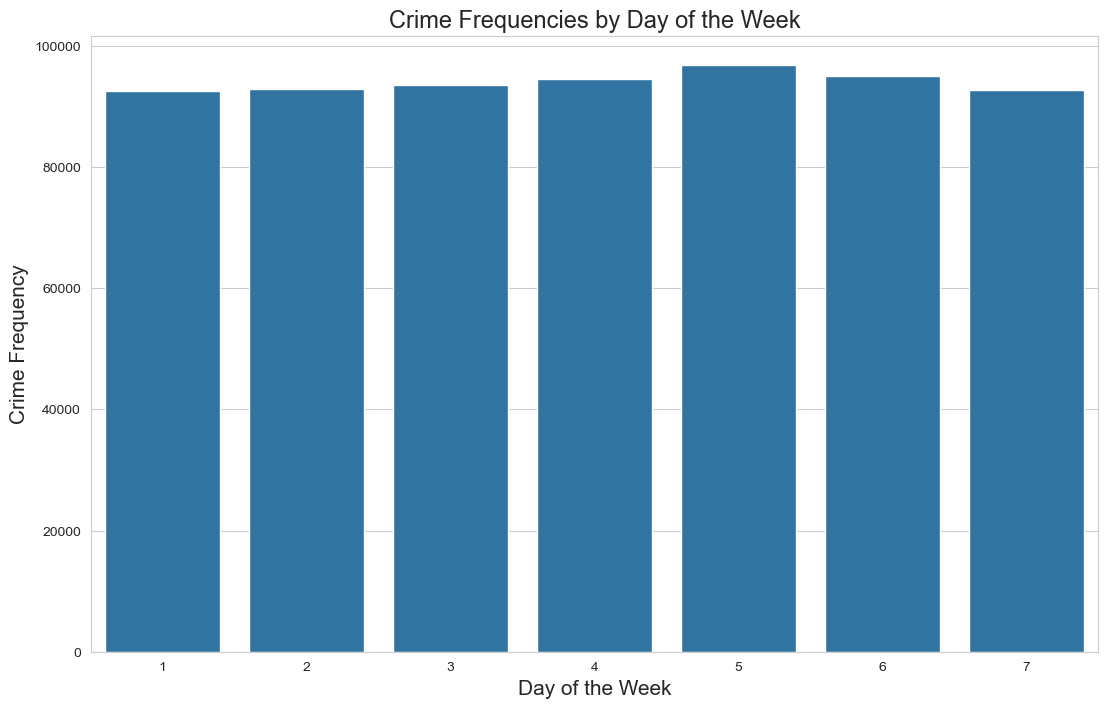

In [183]:
crime_frequencies = [d1, d2, d3, d4, d5, d6, d7]
sns.set_style('whitegrid')
plt.figure(figsize=(13, 8))
g = sns.barplot(x=days_of_week, y=crime_frequencies)
plt.ylabel('Crime Frequency', fontsize=15)
plt.xlabel('Day of the Week', fontsize=15)
plt.title("Crime Frequencies by Day of the Week", fontsize=17)
plt.show()

The original source does not state if "1" is supposed to be Sunday or Monday but examination of the a particular data entry and correlating it with the calendar shows that "1" denotes a Monday, "2" denotes a Tuesday and so on. 
The total counts for each day are surprisingly similar to each other, there is not much variation between them so we can't really say that any particular day is more dangerous than the others. 

In [151]:
crime_dataset['incident_hour_of_day'].value_counts()


incident_hour_of_day
0     42782
12    38551
22    35047
23    34197
17    33914
20    33879
16    33646
21    33552
18    33100
15    32639
19    32176
14    28544
1     28171
13    27821
11    26343
10    26109
2     23751
9     22693
3     19562
8     19204
4     15316
7     13327
5     12819
6     11055
Name: count, dtype: int64

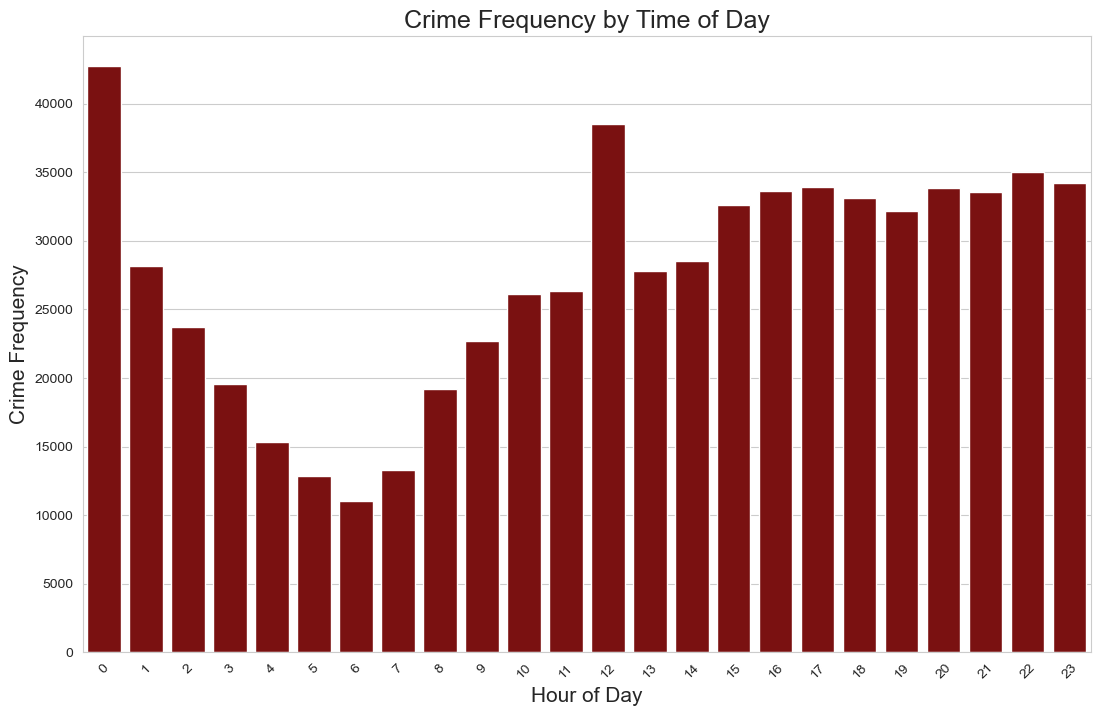

In [152]:
crime_counts_by_hour = crime_dataset['incident_hour_of_day'].value_counts().reset_index()
crime_counts_by_hour.columns = ['hour_of_day', 'count']
plt.figure(figsize=(13, 8))
sns.barplot(x='hour_of_day', y='count', data=crime_counts_by_hour, color='darkred')
plt.title('Crime Frequency by Time of Day', fontsize=18)
plt.xlabel('Hour of Day', fontsize=15)
plt.ylabel('Crime Frequency', fontsize=15)
plt.xticks(rotation=45)  
plt.show()

Consistent with the pre-existing notion, the majority of crime incidents occur during the night or in the early morning hours. This pattern highlights the importance of understanding the timing of criminal activity, as nighttime hours tend to create conditions that may contribute to higher crime rates. Recognizing this trend can be vital for law enforcement and community safety efforts, enabling them to allocate resources more effectively during these critical times.

Examining the top 10 most frequent crimes by the day of the week: 

In [153]:
crime_dataset.groupby('incident_day_of_week')['offense_category'].apply(lambda x: x.value_counts().head(10))


incident_day_of_week                    
1                     ASSAULT               17110
                      LARCENY               13377
                      DAMAGE TO PROPERTY    12187
                      AGGRAVATED ASSAULT     9239
                      STOLEN VEHICLE         8793
                                            ...  
7                     BURGLARY               6469
                      FRAUD                  5480
                      WEAPONS OFFENSES       2750
                      ROBBERY                2129
                      STOLEN PROPERTY        1581
Name: offense_category, Length: 70, dtype: int64

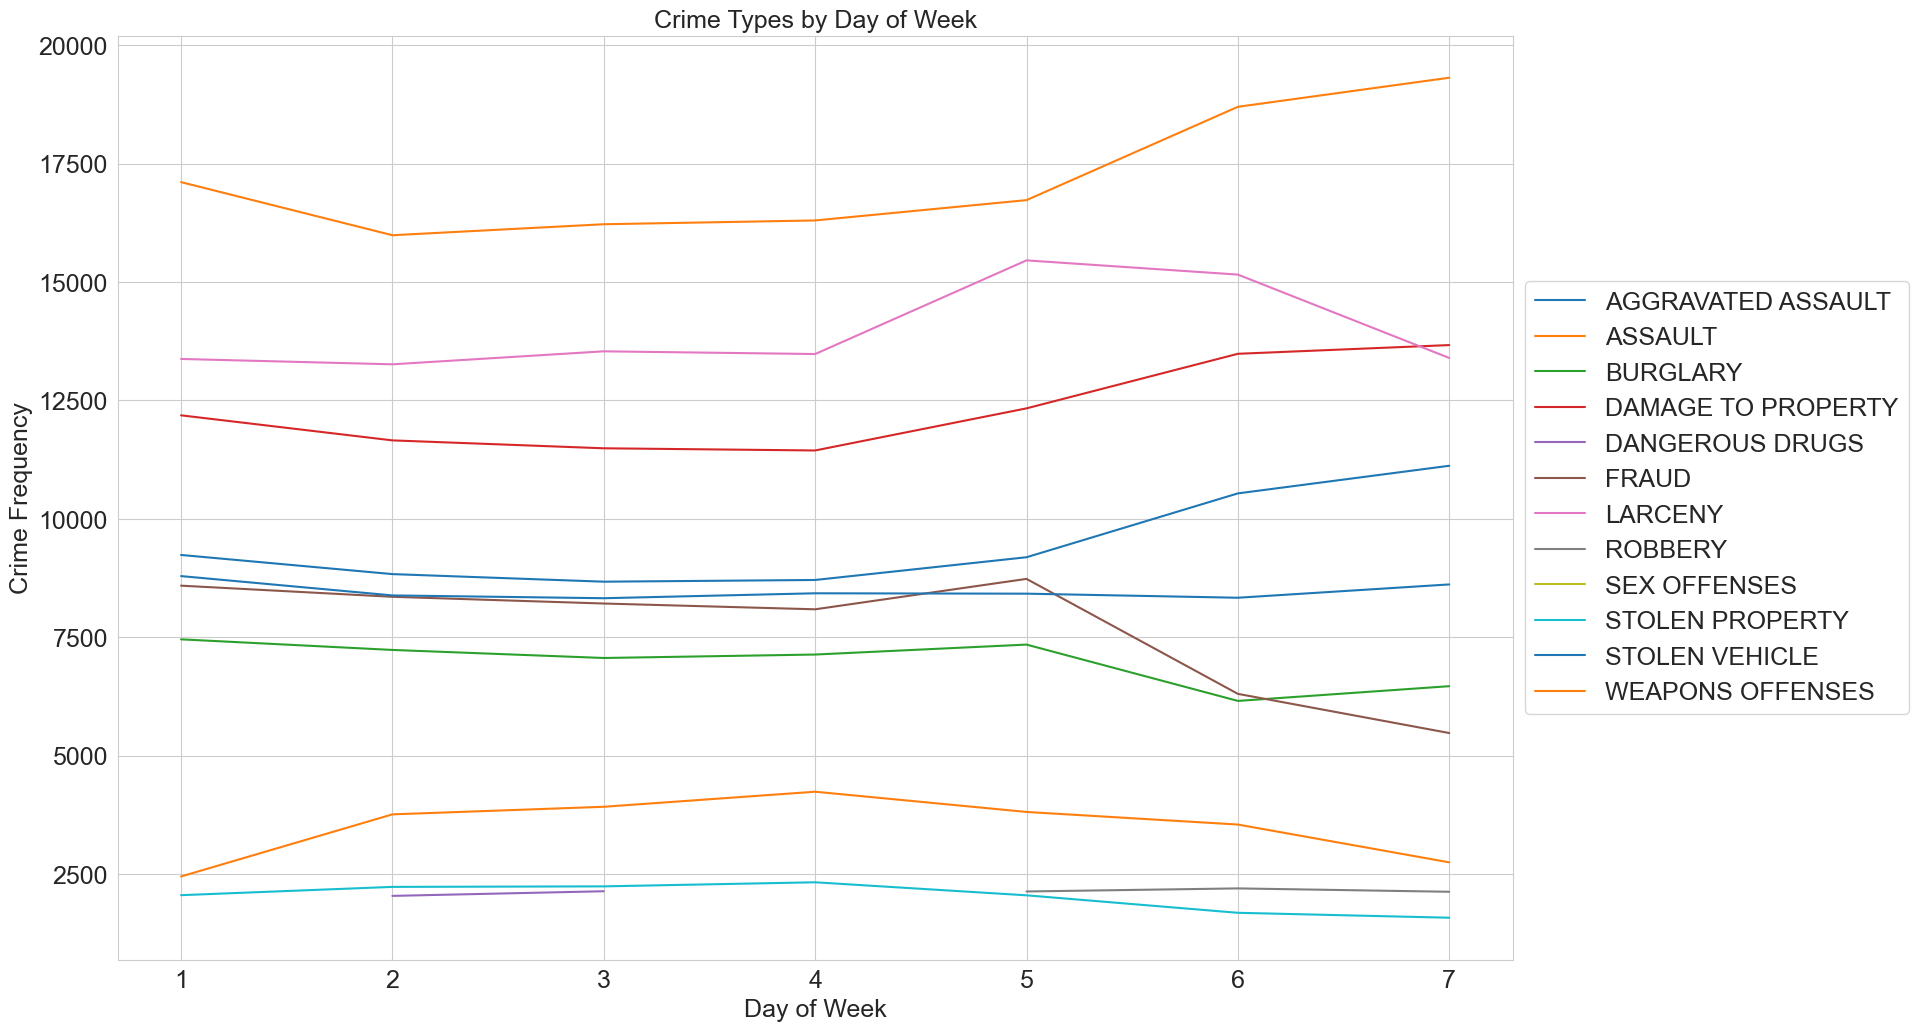

In [184]:
fig, ax = plt.subplots(figsize=(18,12))
crime_dataset.groupby('incident_day_of_week')['offense_category'].apply(lambda x: x.value_counts().head(10)).unstack().plot(ax=ax)
plt.title('Crime Types by Day of Week', fontsize = 18)
ax.set_xlabel('Day of Week', fontsize = 18)
ax.set_ylabel('Crime Frequency', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":18})

The analysis of the data highlights several noticeable gaps in some of the lines, reflecting a lack of crime incidents for specific hour-crime combinations. This absence indicates that certain times may see little to no criminal activity, which could be relevant for understanding broader crime trends. Additionally, the graph demonstrates that crimes such as assault and damage to property are significantly more likely to occur over the weekend. This pattern suggests that social interactions and gatherings during this time may escalate into conflicts or property-related offenses.

In contrast, offenses like burglary and fraud show a decline during the weekend. This decrease can likely be attributed to the fact that many people are at home, making it less appealing for potential burglars to strike when homes are occupied. The lower incidence of fraud over the weekend further supports this idea, as much of this crime typically occurs online. People tend to be less engaged with their devices and the internet during leisure time on weekends, leading to fewer opportunities for online fraud.

These insights into the timing and nature of different crime types underscore the importance of context in crime prevention strategies. By recognizing when and where crimes are likely to occur, law enforcement and community organizations can better allocate resources and develop targeted initiatives that address the specific challenges faced during peak times, ultimately enhancing public safety efforts.

Let's do the same thing again but taking hour of the day into focus this time


In [155]:
crime_dataset.groupby('incident_hour_of_day')['offense_category'].apply(lambda x: x.value_counts().head(10))


incident_hour_of_day                        
0                     ASSAULT                   7483
                      LARCENY                   5758
                      DAMAGE TO PROPERTY        5535
                      FRAUD                     4839
                      AGGRAVATED ASSAULT        4422
                                                ... 
23                    WEAPONS OFFENSES          1972
                      BURGLARY                  1516
                      ROBBERY                    903
                      FRAUD                      792
                      OBSTRUCTING THE POLICE     507
Name: offense_category, Length: 240, dtype: int64

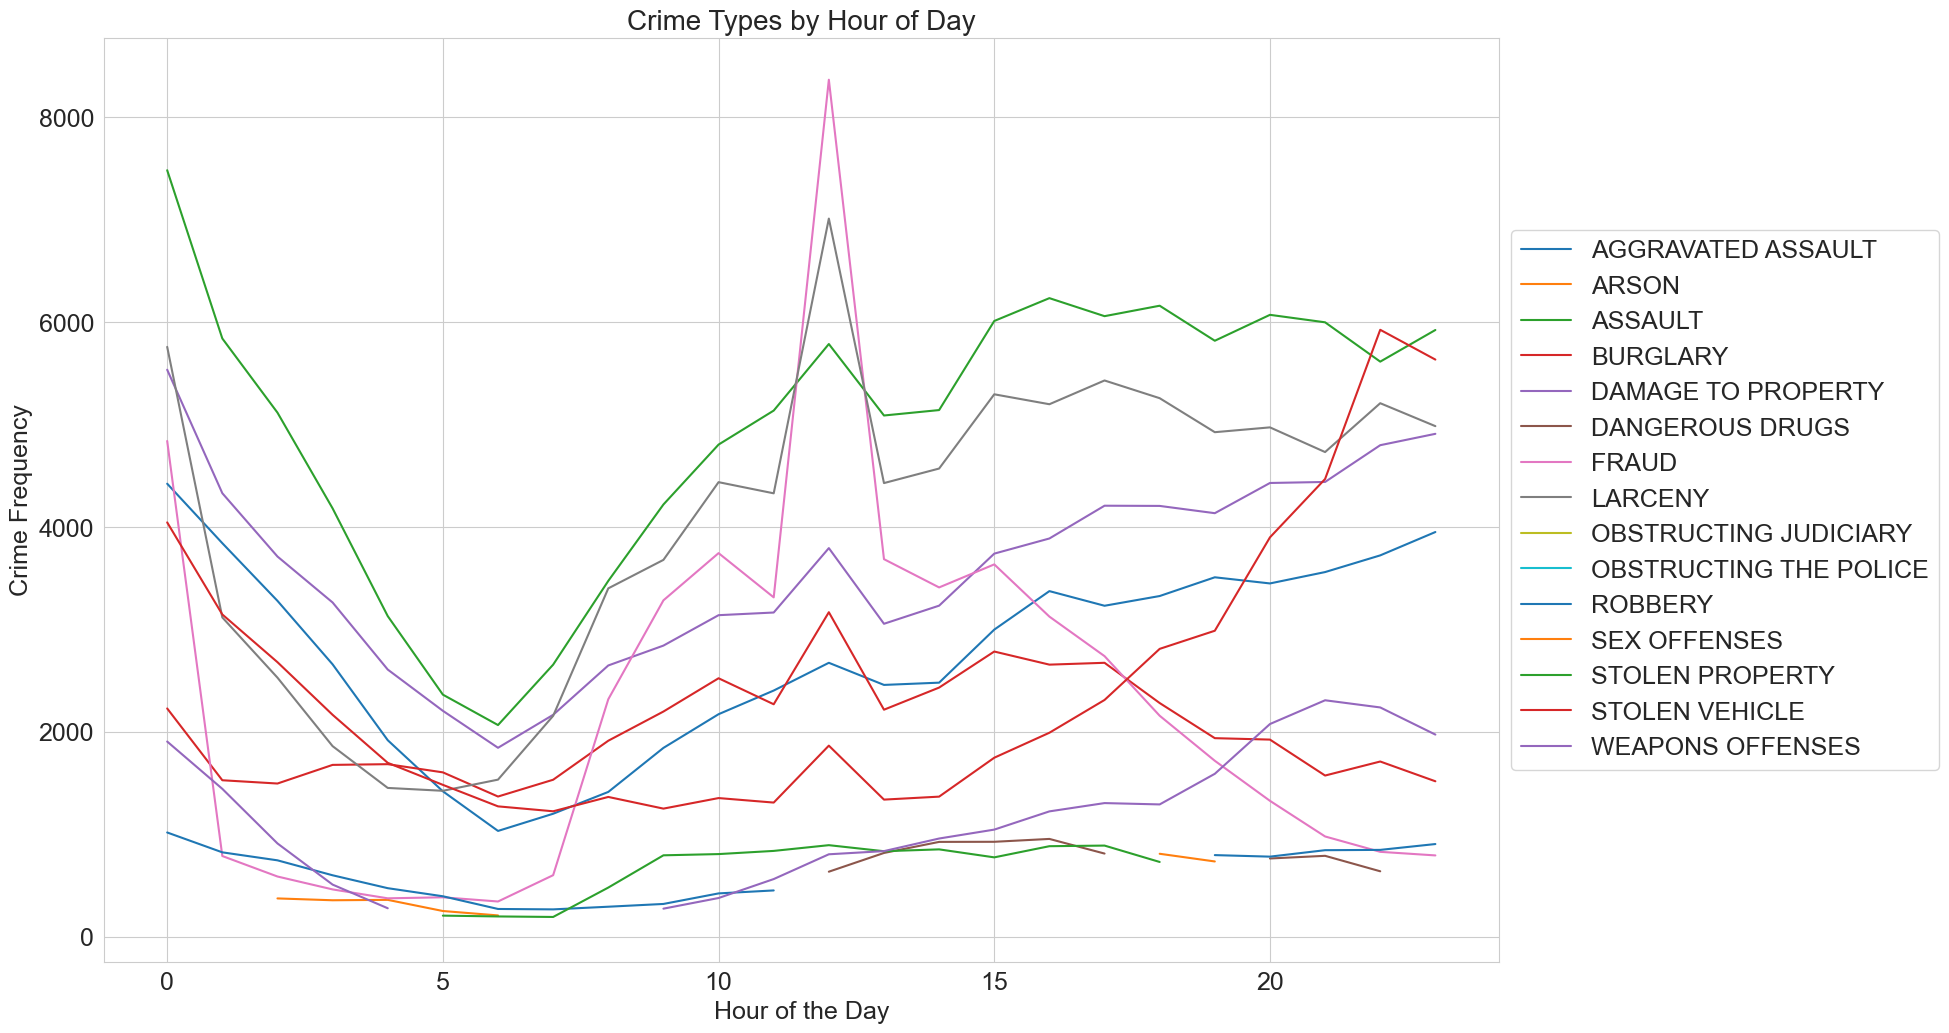

In [185]:
fig, ax = plt.subplots(figsize=(18,12))
crime_dataset.groupby('incident_hour_of_day')['offense_category'].apply(lambda x: x.value_counts().head(10)).unstack().plot(ax=ax)
plt.title('Crime Types by Hour of Day', fontsize = 20)
ax.set_xlabel('Hour of the Day', fontsize = 18)
ax.set_ylabel('Crime Frequency', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":18})

The graph presented above exhibits a trend similar to that of the previous hour-based analysis, revealing a typical decrease in criminal activity during the middle of the day. This pattern aligns with the expectation that fewer crimes are committed when businesses are open and people are going about their daily activities. However, there are notable exceptions, particularly when examining specific types of offenses. 

Crimes such as assault, aggravated assault, and larceny experience a significant spike around 4 a.m., suggesting that late-night social activities or confrontations contribute to heightened violence during these early hours. This increase could indicate that as the night progresses, tensions may rise among individuals, leading to more frequent altercations.

Conversely, certain crimes, including larceny and drug-related offenses, show a marked increase at around 4 p.m. This timing could be related to various factors, such as the end of the workday when individuals are more likely to be out and about, thus providing potential opportunities for theft or drug transactions. It's also important to note that these particular crimes remain relatively less common throughout the day overall, yet their spikes at these specific times highlight critical windows for law enforcement intervention.

Understanding the timing of these crime spikes is essential for developing effective strategies to enhance public safety. By identifying periods of increased risk, authorities can allocate resources more effectively and implement preventative measures tailored to these high-activity times, thereby working to reduce crime rates in the community.

Now, moving onto the top crimes with keep the month in focus


In [157]:
crime_dataset.groupby('month')['offense_category'].apply(lambda x: x.value_counts().head(10))


month                    
1      ASSAULT               8944
       LARCENY               7629
       DAMAGE TO PROPERTY    6517
       STOLEN VEHICLE        4803
       FRAUD                 4701
                             ... 
12     BURGLARY              4597
       FRAUD                 4203
       WEAPONS OFFENSES      1679
       ROBBERY               1282
       STOLEN PROPERTY       1107
Name: offense_category, Length: 120, dtype: int64

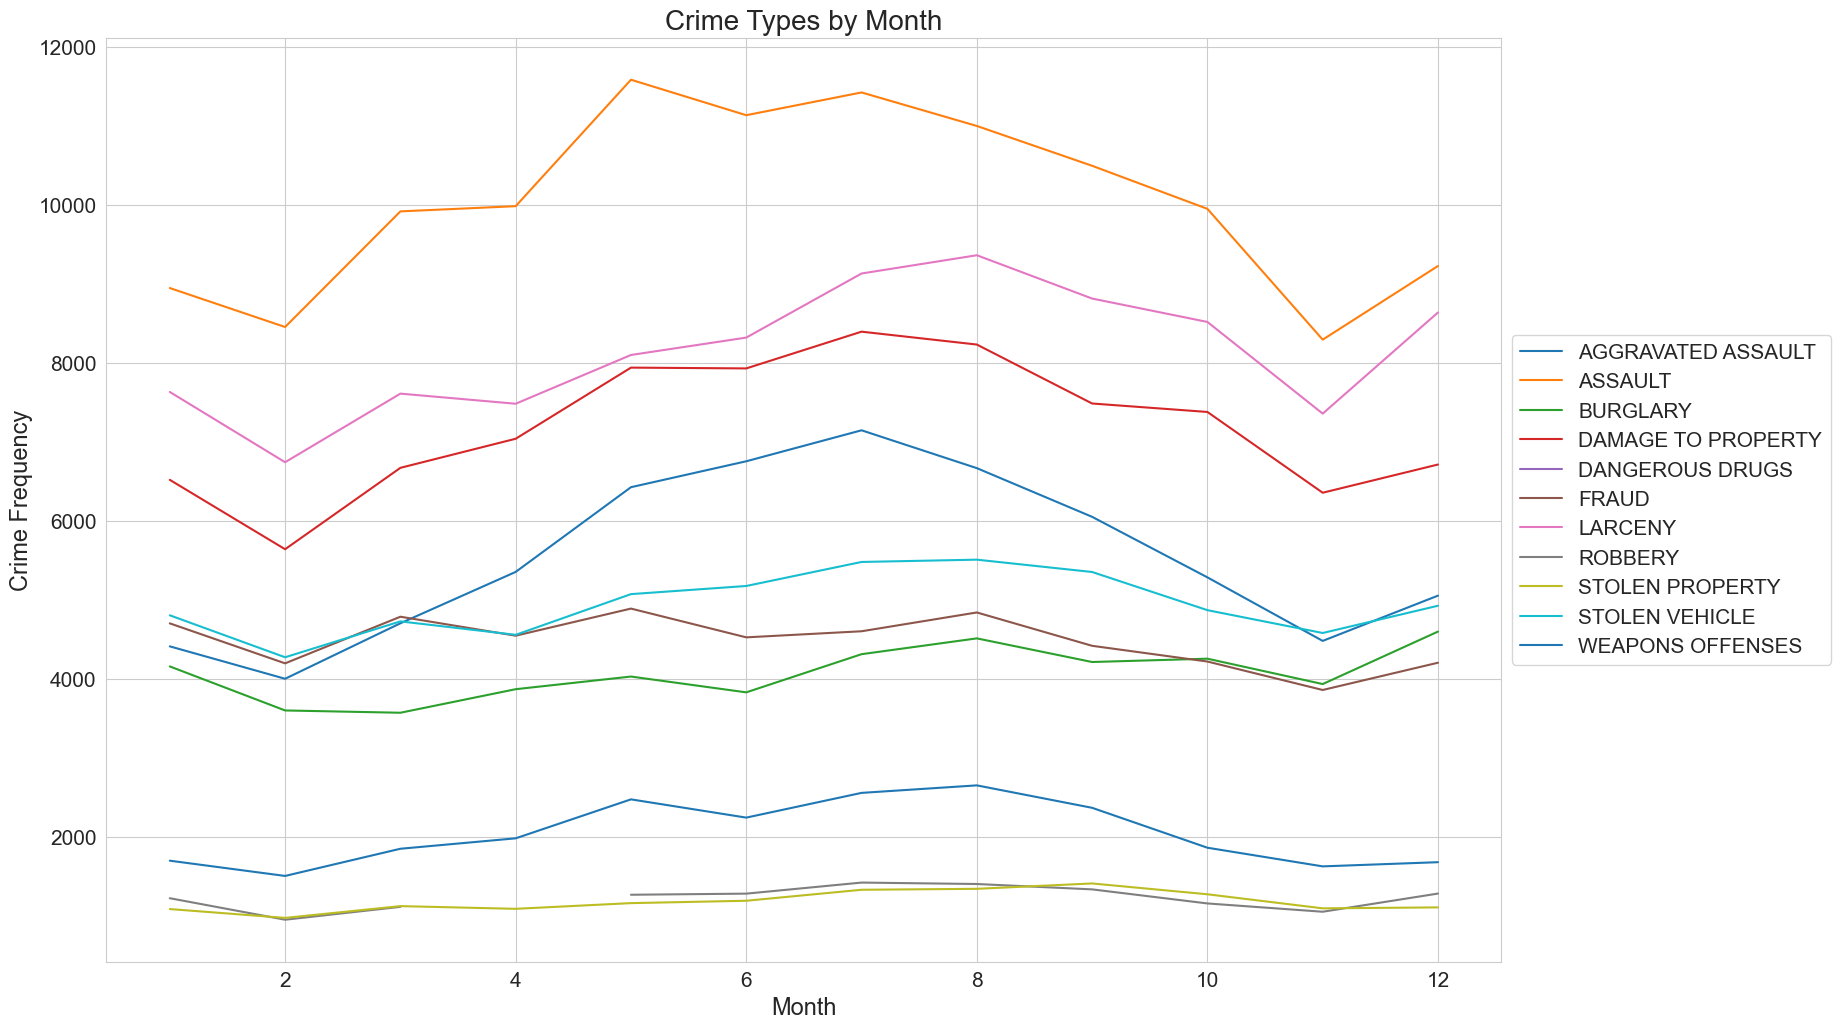

In [158]:
fig, ax = plt.subplots(figsize=(18,12))
crime_dataset.groupby('month')['offense_category'].apply(lambda x: x.value_counts().head(10)).unstack().plot(ax=ax)
plt.title('Crime Types by Month', fontsize = 20)
ax.set_xlabel('Month', fontsize = 17)
ax.set_ylabel('Crime Frequency', fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

The data indicates that a significant majority of crimes experience their yearly peak during the months of May and June, followed by a noticeable declining trend throughout the remainder of the year. This seasonal pattern aligns with the hypothesis that warmer weather may encourage higher levels of criminal activity, as individuals are more likely to be active and social during milder months. 

With the arrival of spring and early summer, more people tend to engage in outdoor activities, which can create opportunities for various types of crimes. Increased social interactions during this period may lead to higher instances of conflicts or impulsive behavior, contributing to a rise in offenses. Moreover, the favorable weather conditions can entice individuals who might not otherwise commit crimes during colder months.

As the temperature begins to drop later in the year, the decrease in crime rates suggests a corresponding decline in outdoor activities and social gatherings, leading to reduced opportunities for criminal behavior. Recognizing this cyclical trend is crucial for law enforcement and community safety initiatives, as targeted efforts during peak months can help mitigate the surge in criminal activity and enhance public safety strategies throughout the year.

### iii. Crime Trends Across Various Neighborhoods and Council Districts of Detroit

In [159]:
crime_dataset['neighborhood'].value_counts()


neighborhood
Warrendale           17569
Downtown             15947
Franklin Park        12472
Midtown              12019
Bethune Community    10627
                     ...  
Melvern Hill           167
Arden Park             147
Waterworks Park        111
Douglass                63
Belle Isle              52
Name: count, Length: 205, dtype: int64

Since there are over 200 neighbourhoods, it is too hard to analyze them all. The first 10 neighbourhoods account for about 20% of the crimes committed so it is better to focus on the top 30 neighbourhoods for the analysis

In [160]:

#selecting top 30
top30_neighbourhoods = crime_dataset['neighborhood'].value_counts()[0:30]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Warrendale'),
  Text(0, 1, 'Downtown'),
  Text(0, 2, 'Franklin Park'),
  Text(0, 3, 'Midtown'),
  Text(0, 4, 'Bethune Community'),
  Text(0, 5, 'Outer Drive-Hayes'),
  Text(0, 6, 'Brightmoor'),
  Text(0, 7, 'Regent Park'),
  Text(0, 8, 'Barton-McFarland'),
  Text(0, 9, 'Dexter-Linwood'),
  Text(0, 10, 'Claytown'),
  Text(0, 11, 'Oakman Blvd Community'),
  Text(0, 12, 'Morningside'),
  Text(0, 13, 'Cornerstone Village'),
  Text(0, 14, 'Midwest'),
  Text(0, 15, 'Nolan'),
  Text(0, 16, 'Bagley'),
  Text(0, 17, 'Central Southwest'),
  Text(0, 18, 'Springwells'),
  Text(0, 19, 'Mapleridge'),
  Text(0, 20, 'Fitzgerald/Marygrove'),
  Text(0, 21, 'Greenfield'),
  Text(0, 22, 'Schulze'),
  Text(0, 23, 'Warren Ave Community'),
  Text(0, 24, 'Moross-Morang'),
  Text(0, 25, 'Airport Sub'),
  Text(0, 26, 'Crary/St Marys'),
  Text(0, 27, 'College Par

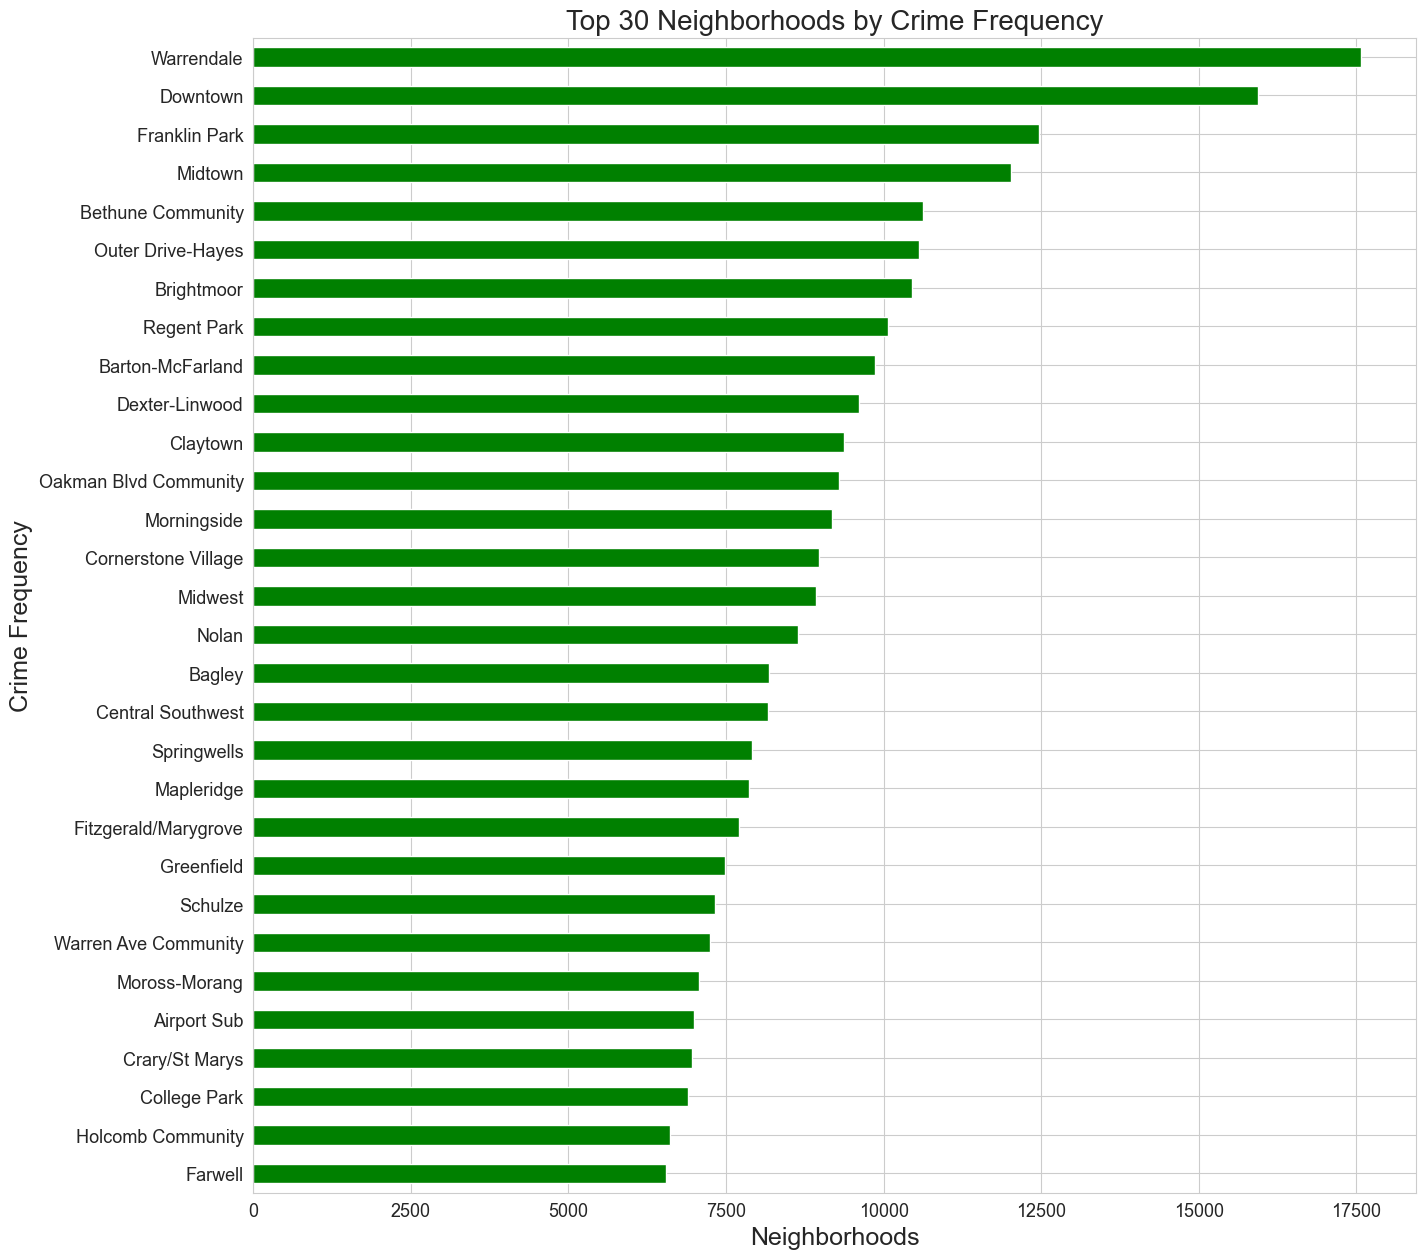

In [161]:
fig = plt.figure(figsize = (15, 15))
ax = top30_neighbourhoods.plot(kind='barh', color = 'green')
plt.gca().invert_yaxis()
plt.title("Top 30 Neighborhoods by Crime Frequency", fontsize = 20)
plt.xlabel("Neighborhoods", fontsize = 18)
plt.ylabel("Crime Frequency", fontsize = 18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

For context, Warrendale is the most populous neightourhood in the ciry of Detroit.  It is located in the northwest part of the city, and is known for its diverse population and vibrant.   The neighborhood is home to many small businesses, including restaurants, shops, and services.  It  is also home to several parks and green spaces, including the popular Warrendale Park.

Focusing on Council Districts now,

In [162]:
crime_dataset['council_district'].value_counts()


council_district
7.0    101367
2.0     96763
1.0     95787
5.0     94879
4.0     90037
3.0     88900
6.0     84289
Name: count, dtype: int64

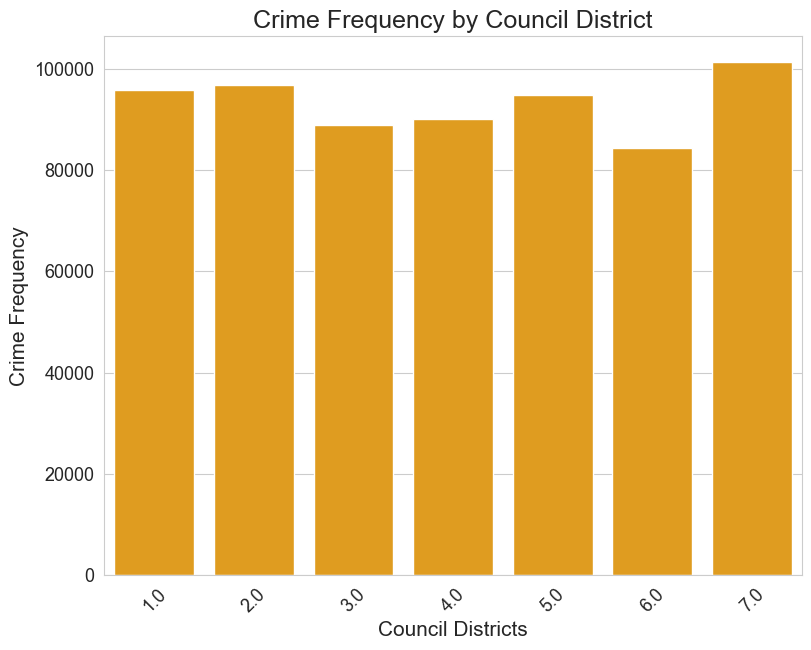

In [163]:
crime_counts_by_district = crime_dataset['council_district'].value_counts().reset_index()
crime_counts_by_district.columns = ['council_district', 'count']
plt.figure(figsize=(9, 7))
sns.barplot(x='council_district', y='count', data=crime_counts_by_district, color='orange')
plt.title('Crime Frequency by Council District', fontsize=18)
plt.xlabel('Council Districts', fontsize=15)
plt.ylabel('Crime Frequency', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(rotation=45) 
plt.show()

Districts 7, 2 and 1 have the most amount of recorded crime where the 6th district has the lowest crime rate.  The 6th district is located in the north of the city and is known for its high standard  of living. 

Let us check if there is any similarity between different patterns of crime frequency 

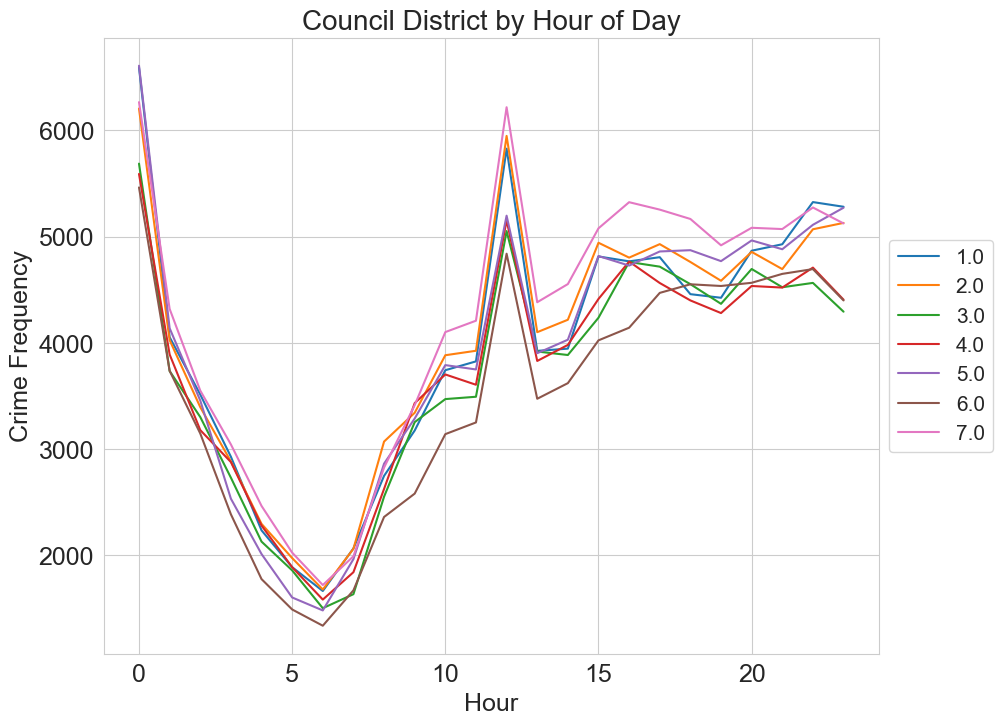

In [187]:
fig, ax = plt.subplots(figsize=(10,8))
crime_dataset.groupby('incident_hour_of_day')['council_district'].apply(lambda x: x.value_counts().head(10)).unstack().plot(ax=ax)
plt.title('Council District by Hour of Day', fontsize = 20)
ax.set_xlabel('Hour', fontsize = 18)
ax.set_ylabel('Crime Frequency', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

From the analysis of the above graph, it is clear that the council districts exhibit a trend consistent with what was observed in the previous hour-of-the-day graph. However, there are notable differences in the heights of the spikes, particularly around midnight (12 a.m.) and 4 p.m. These fluctuations indicate that while the general pattern of crime remains similar across the districts, specific times of increased activity may vary in intensity.

The spike at midnight suggests heightened criminal activity during late-night hours, potentially reflecting conditions that foster criminal behavior, such as nightlife and social interactions. Meanwhile, the peak around 4 p.m. may signify a time when individuals are transitioning from work to their evening activities, creating opportunities for various types of crime. These differences in the heights of the spikes underscore the importance of understanding the timing and intensity of criminal activity within each council district, which can aid law enforcement and community organizations in tailoring their strategies to address crime more effectively. By recognizing these patterns, authorities can focus their resources on the specific times when crime is most likely to occur, ultimately enhancing public safety in the districts.

Taking a look at the top ten most frequent crimes for each district now, 

In [165]:
crime_dataset.groupby('council_district')['offense_category'].apply(lambda x: x.value_counts().head(10))


council_district                    
1.0               ASSAULT               17871
                  DAMAGE TO PROPERTY    12444
                  LARCENY               12143
                  AGGRAVATED ASSAULT    10069
                  STOLEN VEHICLE         9296
                                        ...  
7.0               BURGLARY               7971
                  FRAUD                  7701
                  WEAPONS OFFENSES       3595
                  STOLEN PROPERTY        2193
                  ROBBERY                2106
Name: offense_category, Length: 70, dtype: int64

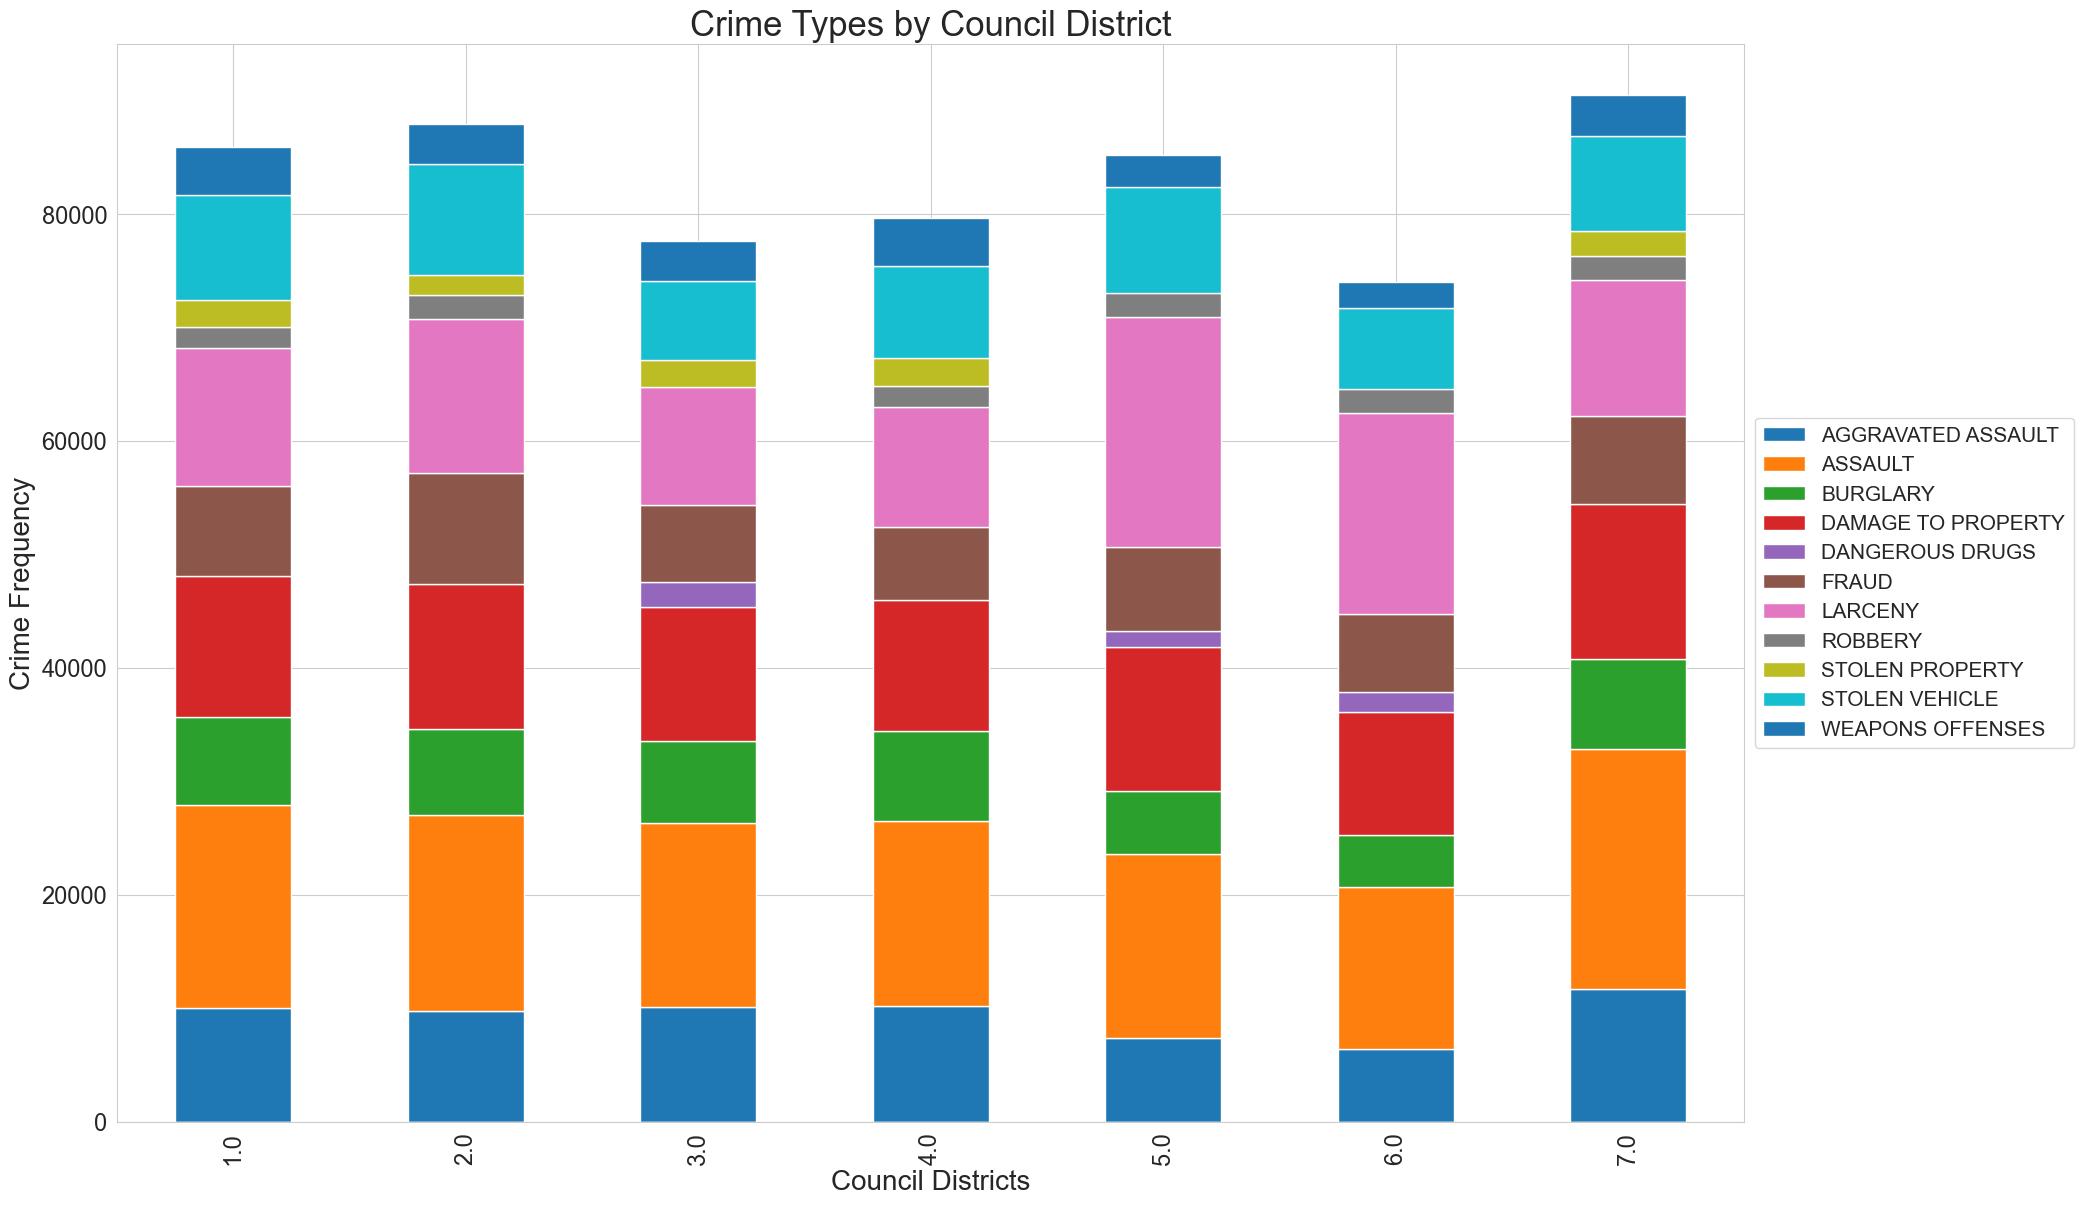

In [166]:
crime_dataset.groupby('council_district')['offense_category'].apply(lambda x: x.value_counts().head(10)).unstack().plot.bar(stacked=True,figsize=(21,14))
plt.title('Crime Types by Council District', fontsize = 25)
plt.xlabel('Council Districts', fontsize = 20)
plt.ylabel('Crime Frequency', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

Overall, the council districts do not exhibit significant differences in their distribution of crime types, suggesting a relatively uniform pattern of criminal activity across the areas analyzed. However, districts 5 and 6, which represent the southern area of Detroit, show a notable tendency to experience higher rates of larceny while reporting slightly fewer instances of burglaries compared to the other districts. This distinction indicates that while the overall crime distribution may be similar, certain specific trends do exist within these neighborhoods.

Having explored the broad distribution of crime categories across the districts, it is now important to take a closer, more granular look at a few select crime types that warrant further investigation. In the next section, we will delve deeper into the following areas of interest:

- Dangerous drugs
- Aggravated assault
- Sex offenses
- Homicide

By focusing on these specific categories, we aim to uncover more detailed insights and trends that may inform our understanding of crime dynamics within the districts, enabling more targeted interventions and strategies for improving community safety.

### iv. Examining Dangerous Drugs, Aggravated Assault, Sex Offenses, and Homicide Across Council Districts of Detroit

 **DANGEROUS DRUGS:**

In [167]:
# finding all the drug types first 
crime_dataset.loc[crime_dataset['offense_category'] == 'DANGEROUS DRUGS', 'offense_description'].unique()


array(['VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)',
       'NON-FATAL SHOOTING', 'ENTRY WITHOUT PERMISSION (NO INTENT)',
       'AGGRAVATED / FELONIOUS ASSAULT',
       'MOTOR VEHICLE AS STOLEN PROPERTY (RECOVERED ONLY)',
       'FORGERY / COUNTERFEITING', 'ASSAULT AND BATTERY/SIMPLE ASSAULT',
       'NARCOTIC EQUIPMENT VIOLATIONS', 'MOTOR VEHICLE THEFT',
       'KIDNAPPING / ABDUCTION',
       'FRAUD - CREDIT CARD/AUTOMATIC TELLER MACHINE',
       'BURGLARY - FORCED ENTRY', 'LARCENY - OTHER', 'MARIJUANA -POSSESS',
       'LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE',
       'RETAIL FRAUD - THEFT', 'STOLEN PROPERTY',
       'FRAUD - FALSE PRETENSE / SWINDLE / CONFIDENCE GAME', 'ROBBERY',
       'DAMAGE TO PROPERTY',
       'LARCENY - THEFT OF MOTOR VEHICLE PARTS / ACCESSORIES',
       'LARCENY - THEFT FROM BUILDING', 'DAMAGE TO PRIVATE PROPERTY',
       'HEROIN - POSSESS',
       'MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)',
       'NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNO

It is pretty clear from the above list that there is alot of overlap between drugs offense types like AGGRAVATED / FELONIOUS ASSAULT, ASSAULT AND BATTERY/SIMPLE ASSAULT and a few other assault offenses. The ambiguity in these classifications raises questions about its origin: Is it due to typos or a lack of rigorous standards in the classification of crime categories? It’s certainly possible that errors made during data entry have led to confusion and inconsistencies in how offenses are recorded. Additionally, varying standards across different jurisdictions may contribute to a disjointed approach in crime categorization.

Alternatively, this overlap might also reflect a deliberate choice to classify certain assaults under drug offenses. For instance, if the decision to commit an assault was significantly influenced by drug use, one could argue that it fits within the drug-related categories. This perspective highlights the complex relationship between substance abuse and violent behavior, suggesting that understanding these nuances is crucial for addressing crime effectively.

While these discrepancies should ideally be clarified and resolved in practical applications, for the purpose of our analysis, we will proceed with the assumption that these classifications, along with any similar issues that may arise from other crime categories, are generally valid. This allows us to focus on exploring the data's patterns and implications without getting bogged down in classification debates.

In [168]:
crime_dataset[crime_dataset.offense_category == 'DANGEROUS DRUGS'].groupby('council_district').offense_description.apply(lambda x: x.value_counts().head(10))


council_district                                                   
1.0               VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)        1255
                  NARCOTIC EQUIPMENT VIOLATIONS                          27
                  MOTOR VEHICLE AS STOLEN PROPERTY (RECOVERED ONLY)      21
                  ASSAULT AND BATTERY/SIMPLE ASSAULT                     17
                  AGGRAVATED / FELONIOUS ASSAULT                         16
                                                                       ... 
7.0               MARIJUANA -POSSESS                                     11
                  STOLEN PROPERTY                                        11
                  FRAUD - CREDIT CARD/AUTOMATIC TELLER MACHINE            7
                  BURGLARY - FORCED ENTRY                                 6
                  DAMAGE TO PROPERTY                                      5
Name: offense_description, Length: 70, dtype: int64

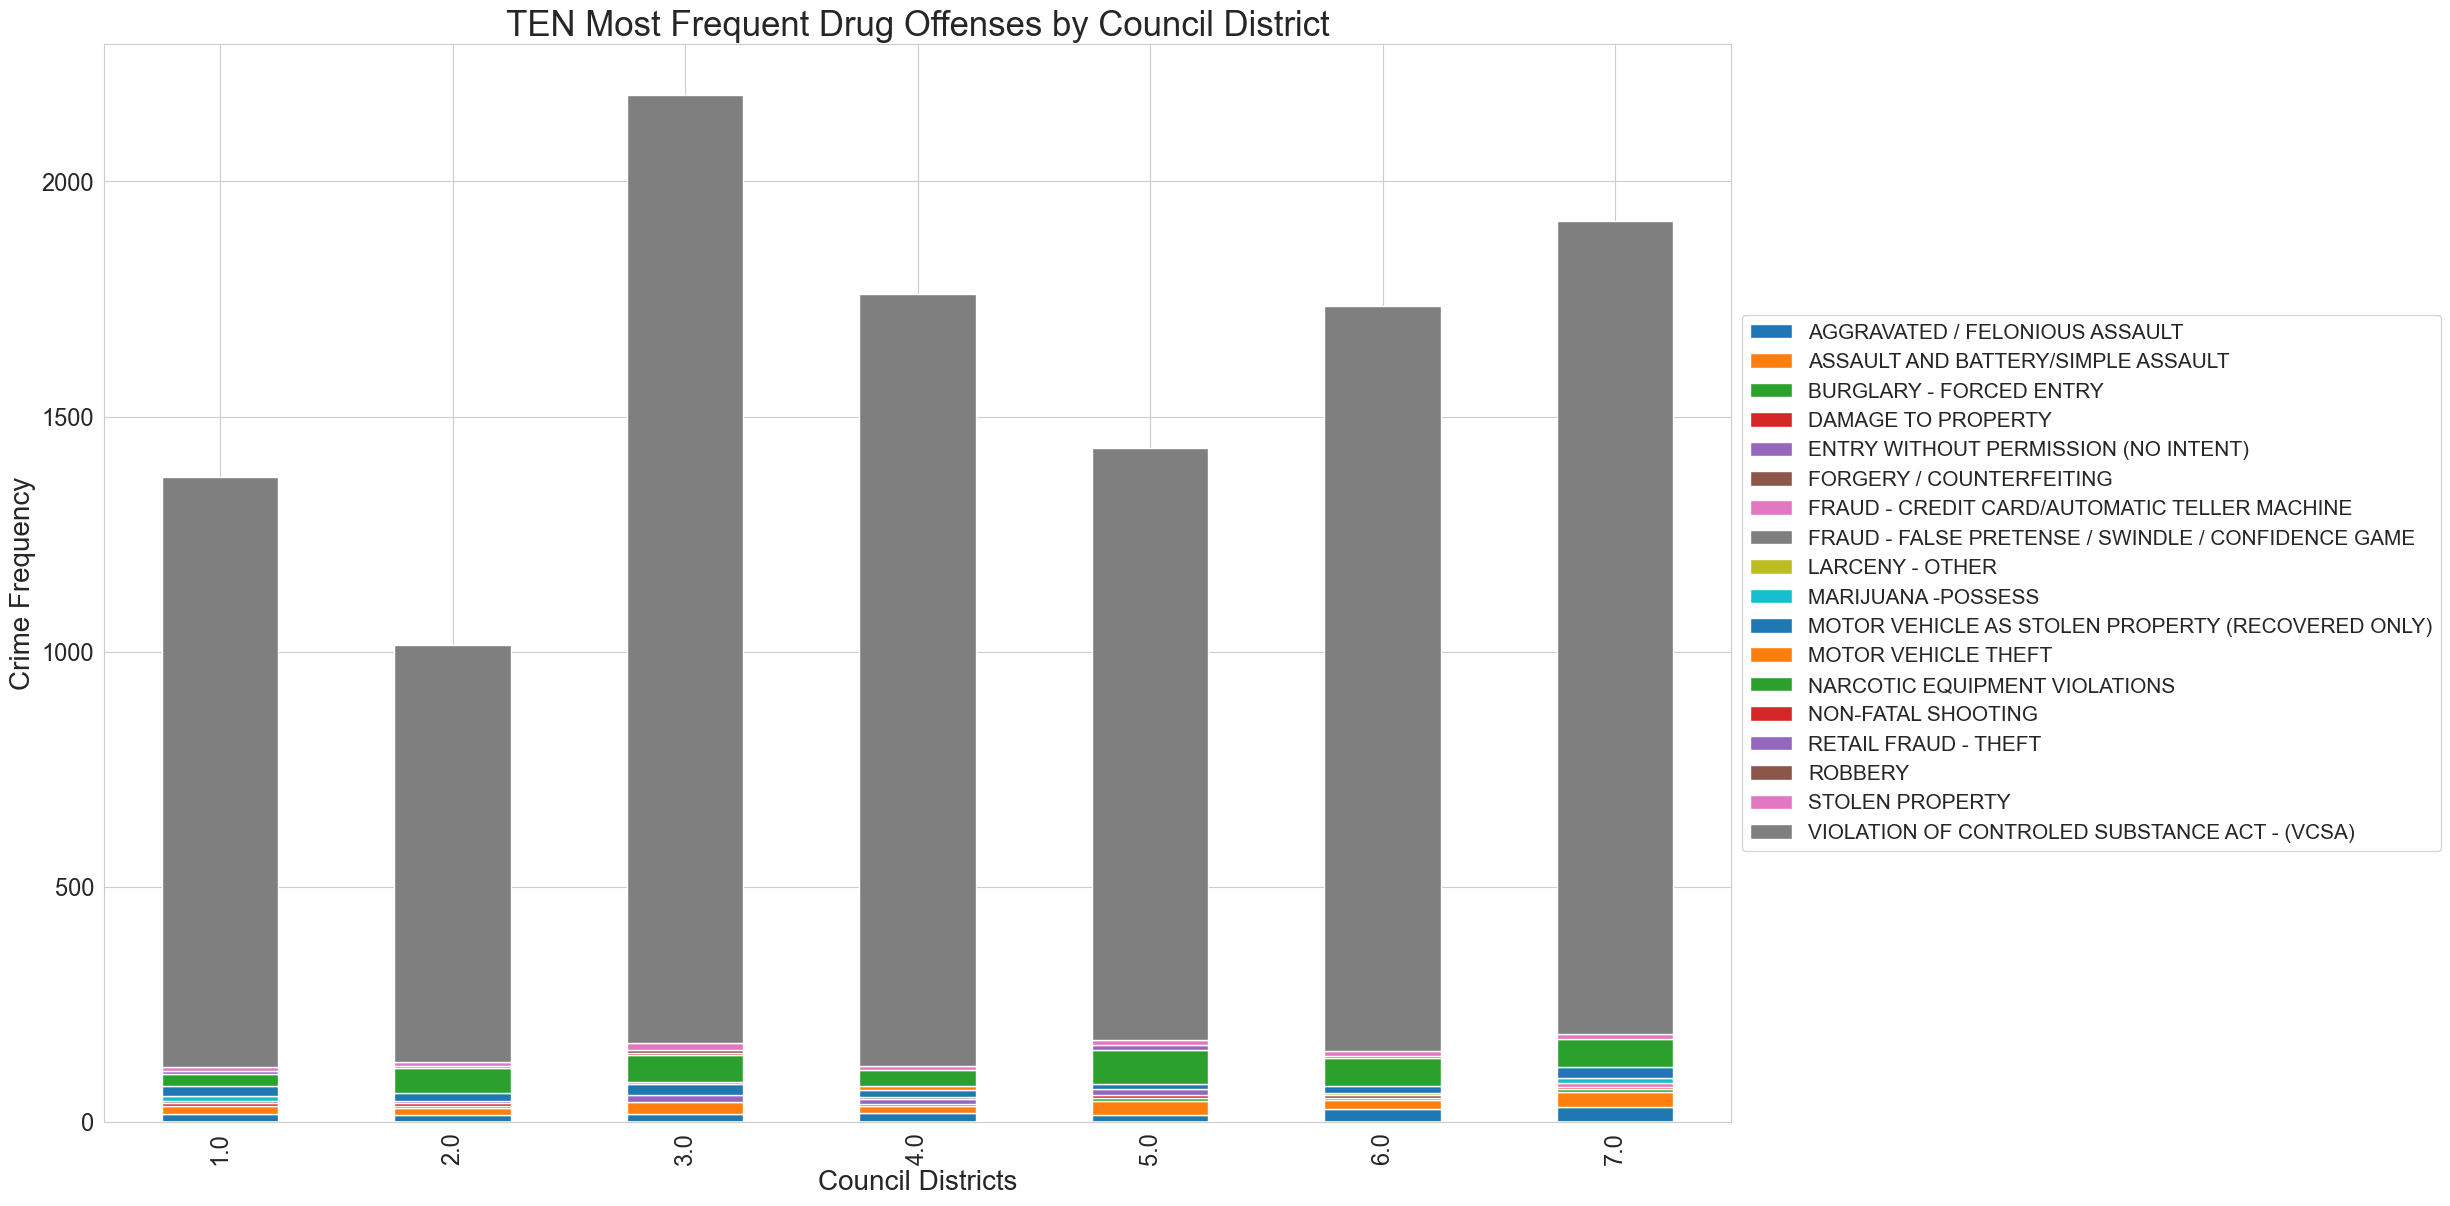

In [169]:
crime_dataset[crime_dataset.offense_category == 'DANGEROUS DRUGS'].groupby('council_district').offense_description.apply(lambda x: x.value_counts().head(10)).unstack().plot.bar(stacked=True,figsize=(21,14))
plt.title('TEN Most Frequent Drug Offenses by Council District', fontsize = 25)
plt.xlabel('Council Districts', fontsize = 20)
plt.ylabel('Crime Frequency', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

Despite the discrepancies we previously discussed, it is clear that Violations of the Controlled Substances Act (VCSA) offenses stand out as the most common type of drug crime across all districts. This prevalence is significant, underscoring a pervasive issue that warrants attention from law enforcement and community stakeholders alike. Following VCSA offenses, 'narcotic equipment violations' appear to be the second most frequent type of drug-related crime, indicating ongoing concerns related to the tools and paraphernalia associated with drug use and distribution.

Furthermore, when we examine the data by district, it becomes evident that districts 7, 3, 4 and 6 bear the brunt of these drug offenses, experiencing notably higher rates of incidents compared to others. District 7, in particular, stands out as the most impacted, facing more than twice the number of offenses reported in district 2. This stark comparison highlights not only the severity of the drug problem in these areas but also emphasizes the need for targeted interventions and resources to combat the challenges posed by drug-related crimes in the most affected districts.

**AGGRAVATED ASSAULT**


In [170]:
crime_dataset.loc[crime_dataset['offense_category'] == 'AGGRAVATED ASSAULT', 'offense_description'].unique()


array(['AGGRAVATED / FELONIOUS ASSAULT',
       'ASSAULT AND BATTERY/SIMPLE ASSAULT', 'NON-FATAL SHOOTING', ' ',
       'ROBBERY', 'MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)',
       'CSC 2ND DEGREE - FORCIBLE CONTACT', 'KIDNAPPING / ABDUCTION',
       'CARJACKING',
       'NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV',
       'CSC 1ST DEGREE - PENIS / VAGINA',
       'AGGRAVATED / FELONIOUS ASSAULT (DOMESTIC)',
       'CSC 3RD DEGREE - ORAL / ANAL',
       'NEGLIGENT HOMICIDE / MANSLAUGHTER (INVOLUNTARY)',
       'CSC 4TH DEGREE - FORCIBLE CONTACT', 'PARENTAL KIDNAPPING',
       'CSC 1ST DEGREE - ORAL / ANAL', 'ASSAULT LESS THAN MURDER',
       'CITIZEN ASSIST'], dtype=object)

In [171]:
crime_dataset[crime_dataset.offense_category == 'AGGRAVATED ASSAULT'].groupby('council_district').offense_description.apply(lambda x: x.value_counts().head(10))


council_district                                                        
1.0               AGGRAVATED / FELONIOUS ASSAULT                            9475
                  NON-FATAL SHOOTING                                         325
                  ASSAULT AND BATTERY/SIMPLE ASSAULT                         148
                  MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)             67
                  KIDNAPPING / ABDUCTION                                      32
                                                                            ... 
7.0               ROBBERY                                                     23
                  CSC 2ND DEGREE - FORCIBLE CONTACT                            3
                  CARJACKING                                                   3
                  CSC 1ST DEGREE - PENIS / VAGINA                              2
                  NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV       2
Name: offense_description, Length: 6

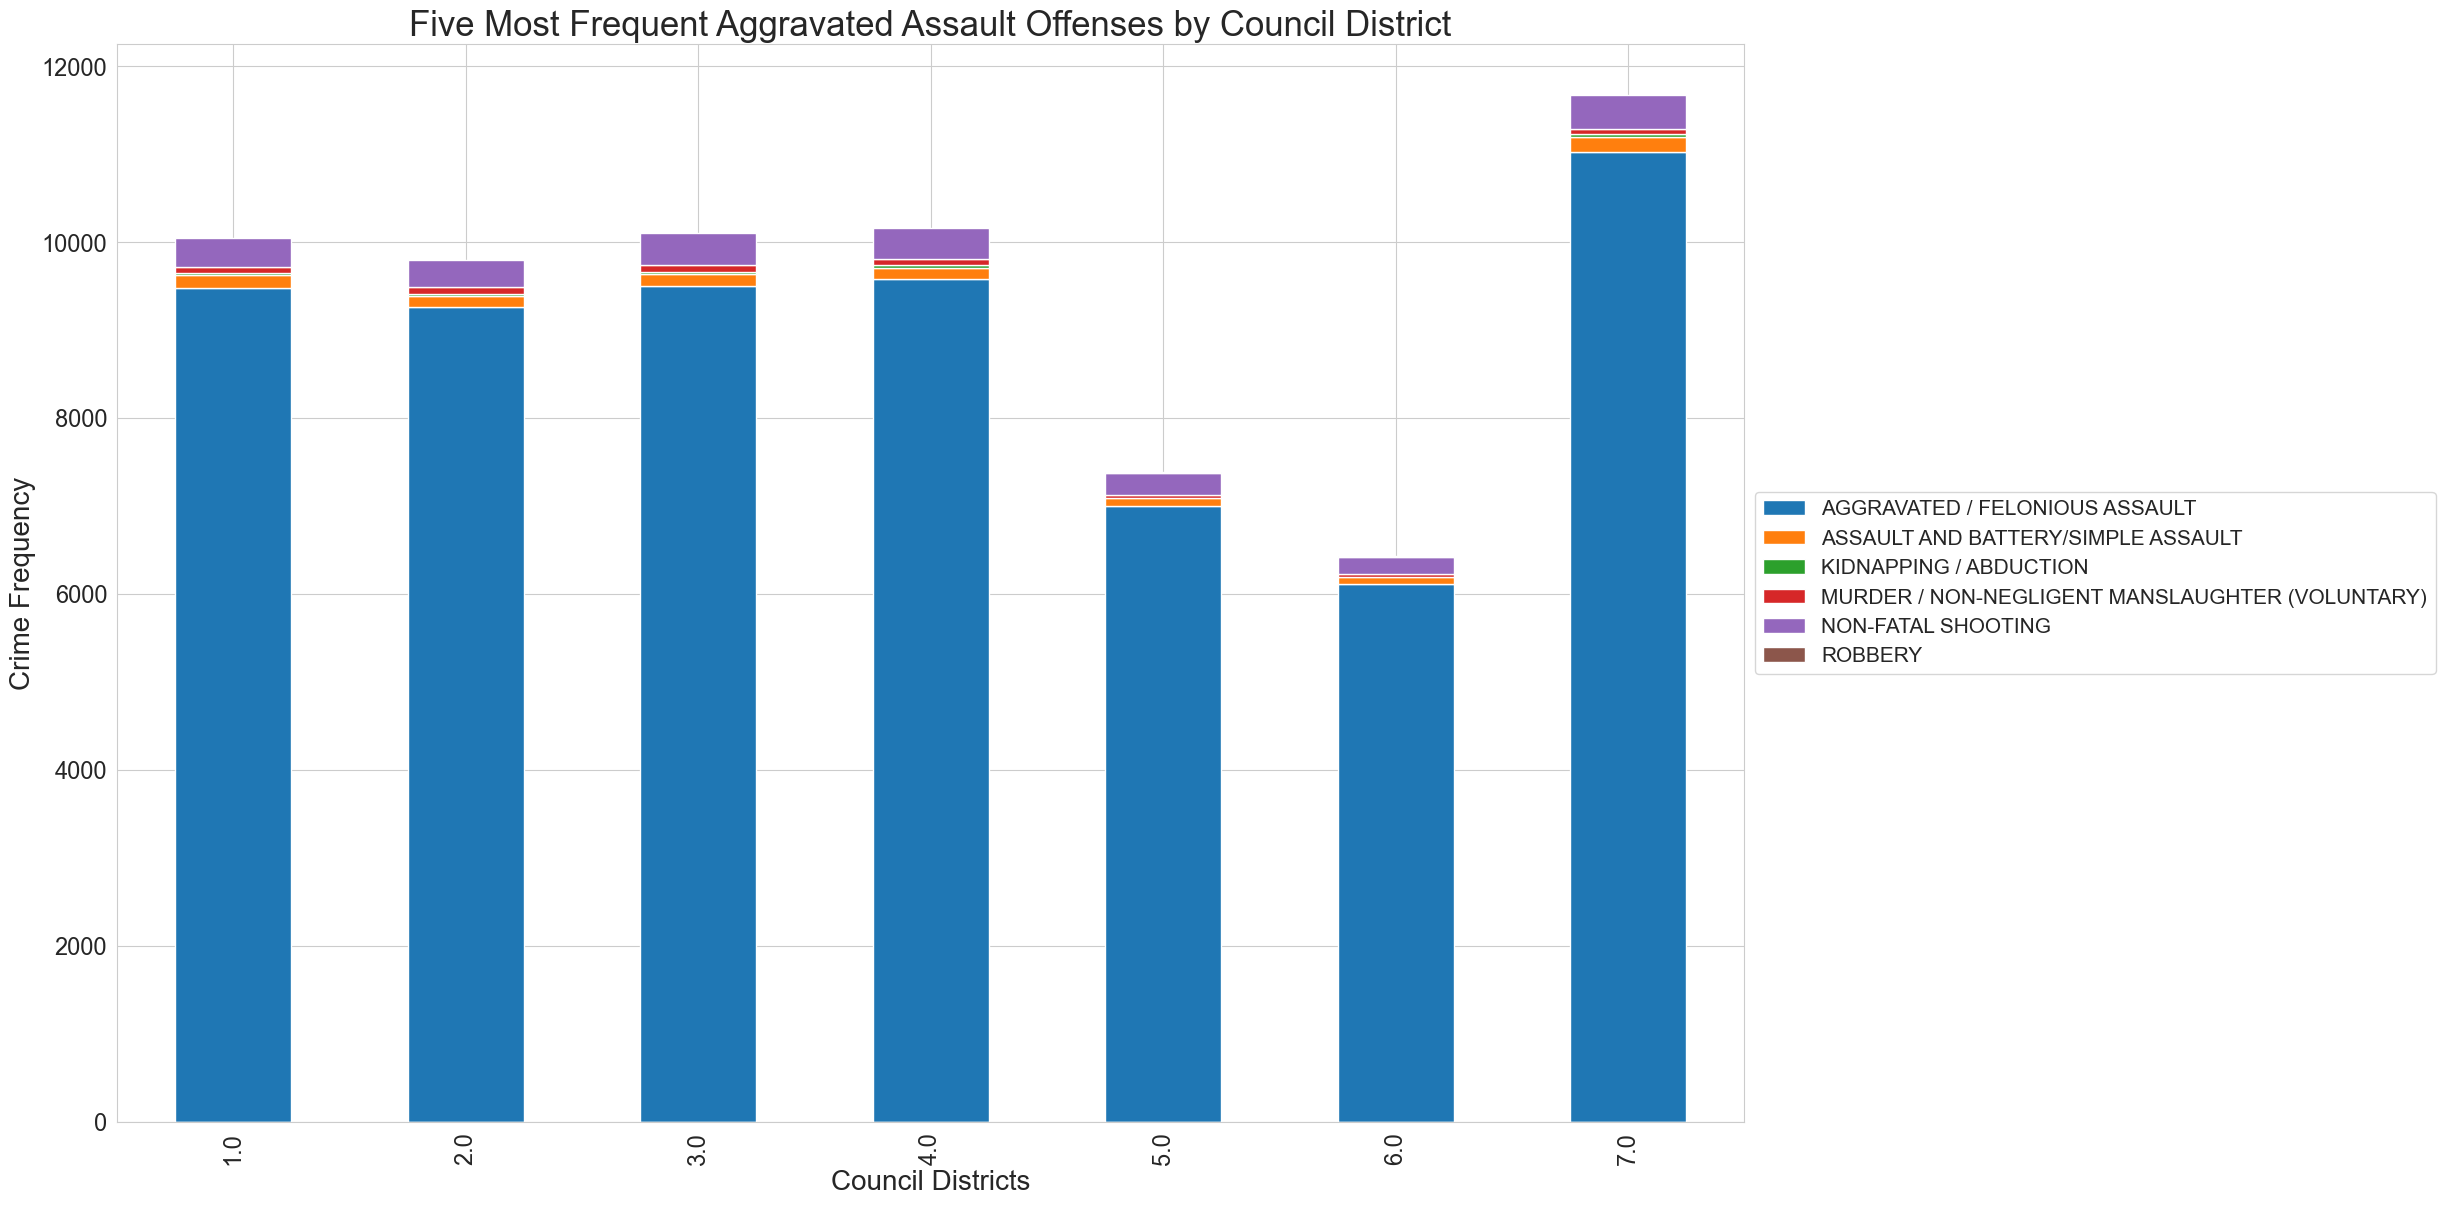

In [172]:
crime_dataset[crime_dataset.offense_category == 'AGGRAVATED ASSAULT'].groupby('council_district').offense_description.apply(lambda x: x.value_counts().head(5)).unstack().plot.bar(stacked=True,figsize=(21,14))
plt.title('Five Most Frequent Aggravated Assault Offenses by Council District', fontsize = 25)
plt.xlabel('Council Districts', fontsize = 20)
plt.ylabel('Crime Frequency', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

General felonious assault offenses are the most prevalent type of crime in the distribution, and the data reveals that district 7 leads by a significant margin, accounting for approximately 1.5 times the instances of assault compared to district 6. Notably, district 6 reports the lowest rates of any type of aggravated assault offenses, which further emphasizes the disparity among the districts. Following closely, district 5 shows the next lowest rates of aggravated assaults, indicating a similar trend.

This pattern suggests that the southern area of Detroit, as represented by these particular districts, experiences the fewest reported incidents of aggravated assaults. This finding raises important questions about the factors contributing to these lower rates, including potential differences in community dynamics, law enforcement practices, or socioeconomic conditions. Understanding these variances can provide valuable insights into crime prevention strategies and inform policy decisions aimed at enhancing public safety in the regions that report higher instances of assault.

**SEX OFFENSES**

In [173]:
crime_dataset.loc[crime_dataset['offense_category'] == 'SEX OFFENSES', 'offense_description'].unique()


array(['CSC 4TH DEGREE - FORCIBLE CONTACT',
       'COMMERCIALIZED SEX - PROSTITUTION',
       'CSC 2ND DEGREE - FORCIBLE CONTACT', 'SEX OFFENSE - OTHER',
       'ASSAULT AND BATTERY/SIMPLE ASSAULT', 'KIDNAPPING / ABDUCTION',
       'LARCENY - OTHER', 'FAMILY - ABUSE / NEGLECT NONVIOLENT',
       'PURCHASING PROSTITUTION',
       'VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)',
       'CSC 1ST DEGREE - OBJECT',
       'COMMERCIALIZED SEX - ASSISTING / PROMOTING PROSTITUTION',
       'SEXUAL PENETRATION NONFORCIBLE - BLOOD / AFFINITY',
       'AGGRAVATED / FELONIOUS ASSAULT',
       'SEXUAL PENETRATION NONFORCIBLE - OTHER', 'INDECENT EXPOSURE',
       'CSC 3RD DEGREE - PENIS / VAGINA', 'DAMAGE TO PROPERTY',
       'RETAIL FRAUD - THEFT', 'CSC 1ST DEGREE - ORAL / ANAL',
       'CSC 1ST DEGREE - PENIS / VAGINA',
       'FRAUD - CREDIT CARD/AUTOMATIC TELLER MACHINE',
       'NARCOTIC EQUIPMENT VIOLATIONS', 'ROBBERY', ' ',
       'MOTOR VEHICLE AS STOLEN PROPERTY (RECOVERED ONLY)',
       '

In [174]:
crime_dataset[crime_dataset.offense_category == 'SEX OFFENSES'].groupby('council_district').offense_description.apply(lambda x: x.value_counts().head(10))


council_district                                                         
1.0               COMMERCIALIZED SEX - PROSTITUTION                          695
                  CSC 2ND DEGREE - FORCIBLE CONTACT                          242
                  CSC 4TH DEGREE - FORCIBLE CONTACT                          201
                  SEX OFFENSE - OTHER                                        143
                  COMMERCIALIZED SEX - ASSISTING / PROMOTING PROSTITUTION      9
                                                                            ... 
7.0               COMMERCIALIZED SEX - ASSISTING / PROMOTING PROSTITUTION      8
                  KIDNAPPING / ABDUCTION                                       8
                  AGGRAVATED / FELONIOUS ASSAULT                               4
                  CSC 1ST DEGREE - ORAL / ANAL                                 4
                  VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)                3
Name: offense_description, Length: 

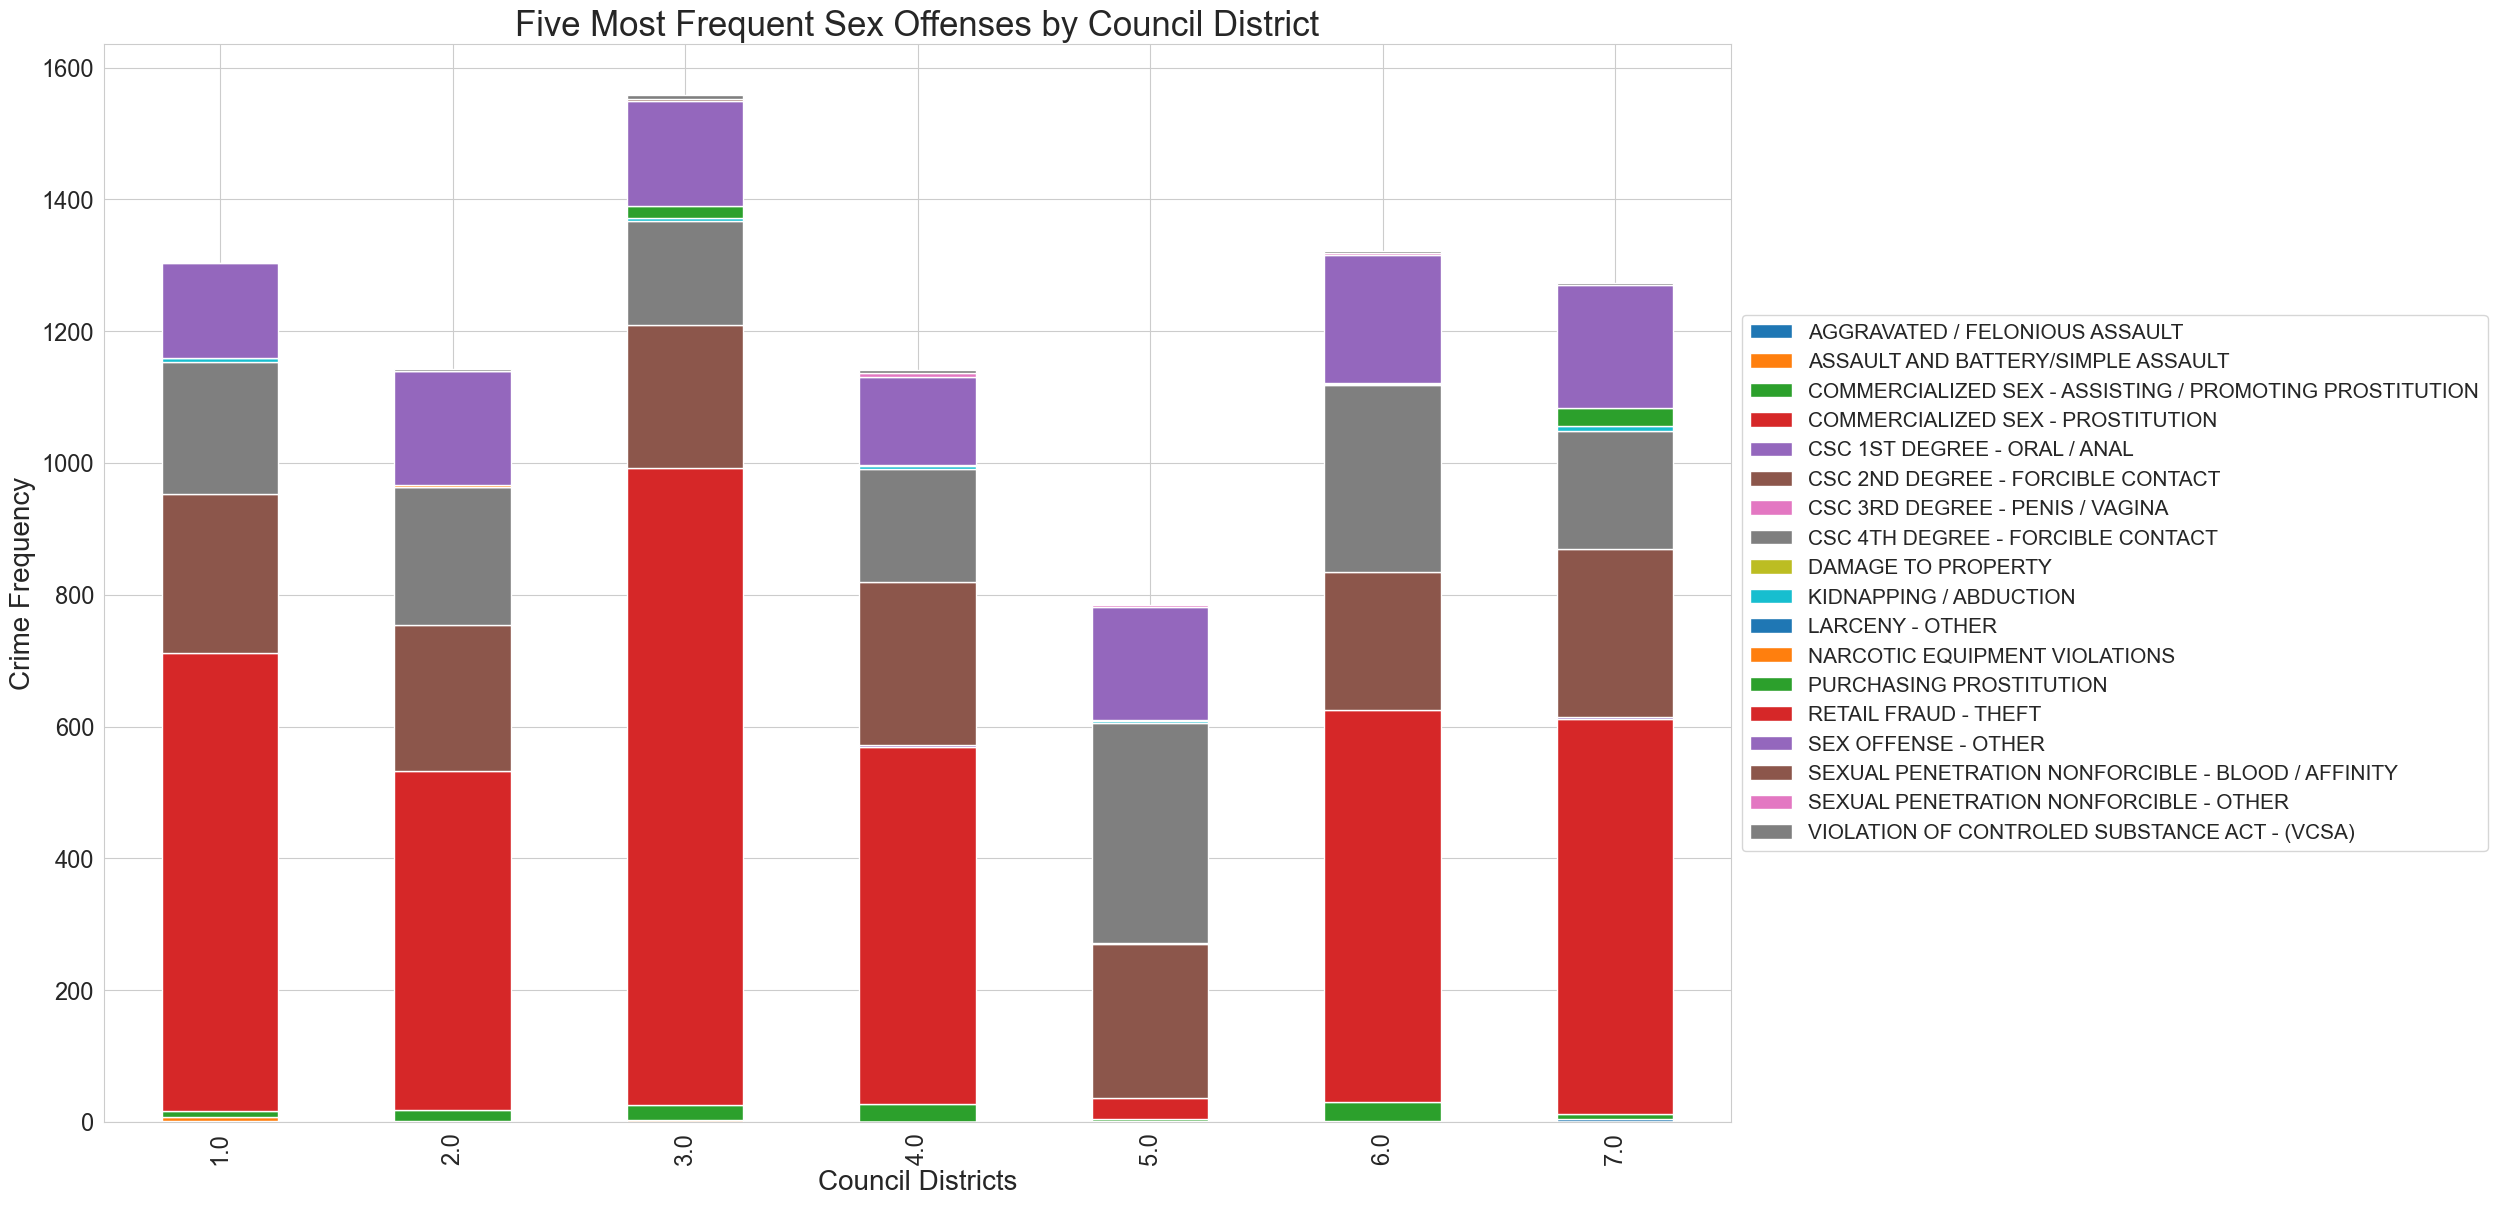

In [175]:
crime_dataset[crime_dataset.offense_category == 'SEX OFFENSES'].groupby('council_district').offense_description.apply(lambda x: x.value_counts().head(10)).unstack().plot.bar(stacked=True,figsize=(21,14))
plt.title('Five Most Frequent Sex Offenses by Council District', fontsize = 25)
plt.xlabel('Council Districts', fontsize = 20)
plt.ylabel('Crime Frequency', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

Prostitution emerges as the most common type of sex offense across nearly all districts, with the notable exception of district 5. This district is primarily characterized by a prevalence of 2nd and 4th degree criminal sexual conduct (CSC) offenses and has reported relatively few incidents of prostitution. 

Among the districts, district 3 stands out with the highest rate of prostitution offenses, experiencing nearly 2.5 times as many as district 5. This significant disparity highlights not only the varying dynamics of sex offenses across districts but also raises questions about the underlying factors influencing these trends. Factors such as law enforcement practices, community resources, and social conditions may all play a role in the variations observed. Understanding these issues is crucial for developing informed strategies that address sex offenses more effectively in the regions most affected.

**HOMICIDE**

In [176]:
crime_dataset.loc[crime_dataset['offense_category'] == 'HOMICIDE', 'offense_description'].unique()


array(['MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)',
       'NEGLIGENT HOMICIDE / MANSLAUGHTER (INVOLUNTARY)',
       'NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV'],
      dtype=object)

In [177]:
crime_dataset[crime_dataset.offense_category == 'HOMICIDE'].groupby('council_district').offense_description.apply(lambda x: x.value_counts())


council_district  1.0                                                   
1.0               MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)           284
                  NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV     15
                  NEGLIGENT HOMICIDE / MANSLAUGHTER (INVOLUNTARY)             3
2.0               MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)           299
                  NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV     14
                  NEGLIGENT HOMICIDE / MANSLAUGHTER (INVOLUNTARY)             4
3.0               MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)           345
                  NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV     23
                  NEGLIGENT HOMICIDE / MANSLAUGHTER (INVOLUNTARY)             5
4.0               MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)           302
                  NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV     28
                  NEGLIGENT HOMICIDE / MANSLAUG

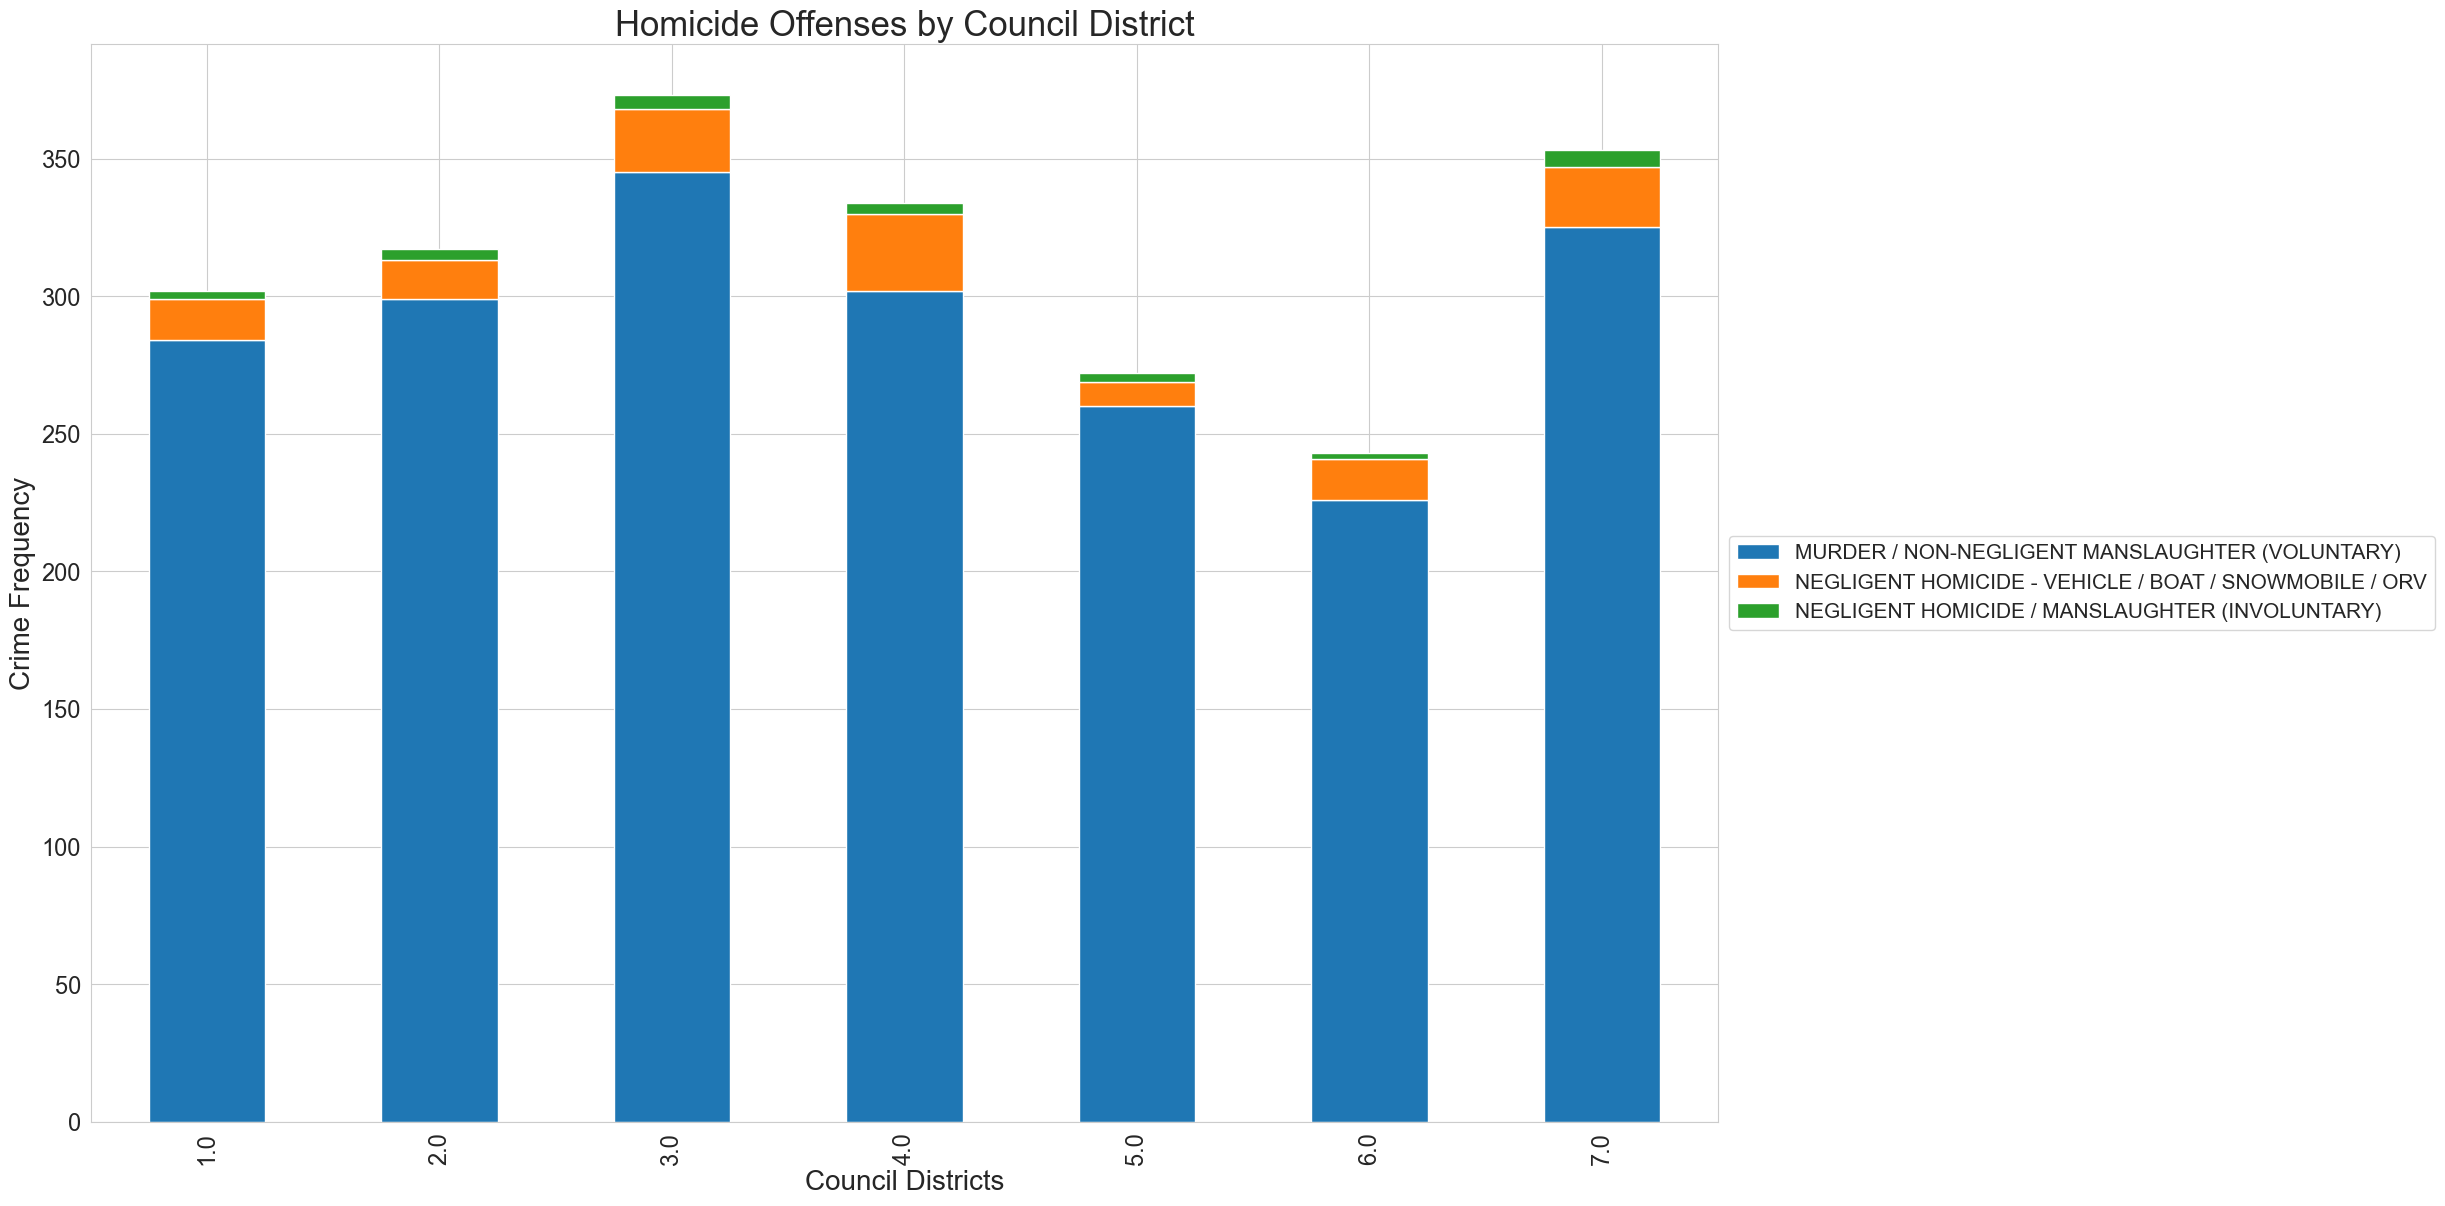

In [178]:
crime_dataset[crime_dataset.offense_category == 'HOMICIDE'].groupby('council_district').offense_description.apply(lambda x: x.value_counts()).unstack().plot.bar(stacked=True,figsize=(21,14))
plt.title('Homicide Offenses by Council District', fontsize = 25)
plt.xlabel('Council Districts', fontsize = 20)
plt.ylabel('Crime Frequency', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

Voluntary murder and non-negligent manslaughter constitute the overwhelming majority of offenses within the distribution. Notably, districts 2 and 3 exhibit nearly identical rates of these serious crimes, demonstrating a concerning prevalence in both areas. In contrast, district 6 reports the lowest rate of voluntary murder and non-negligent manslaughter offenses among the districts analyzed.

This significant concentration of such grave offenses in districts 2 and 3 raises critical questions about the factors that may contribute to these high rates, including socioeconomic conditions, community stability, and law enforcement effectiveness. Understanding the underlying causes of these trends is essential for creating targeted interventions and policies aimed at reducing these violent crimes in the affected districts, while also ensuring that resources are allocated appropriately to address the specific needs of each area.

# C. Hypothesis Testing

Now that we have successfully completed our descriptive analysis, it is time to draw meaningful insights and formulate a testable hypothesis based on our observations. In examining our graph of crime frequencies per hour across the various council districts, district 1 emerges as a particularly interesting case. Its crime patterns significantly diverge from those of the other districts, prompting further investigation into the underlying reasons for this discrepancy. This observation invites us to delve deeper into the data, seeking to understand the factors that may contribute to district 1's unique profile.

To facilitate this analysis, we can utilize the **ANOVA test**, a statistical method designed to compare the means of three or more groups. By applying this test, we can ascertain whether the differences in crime frequencies between the council districts are statistically significant or if they fall within the realm of random fluctuations. Our primary focus will be on district 1, as its distinctiveness in crime patterns may warrant special attention and provide valuable insights.

We can articulate our hypotheses as follows:

- **Null Hypothesis (H₀)**: There is **not** a statistically meaningful difference between the council districts; in essence, their means are equal. This hypothesis posits that any observed variations in crime frequencies are merely coincidental and do not reflect any underlying differences in crime dynamics across the districts.
  
- **Alternative Hypothesis (Hₐ)**: There **is** a statistically meaningful difference between the council districts; at least one district's mean is not equal to the others. This hypothesis suggests that the crime patterns are distinct enough to warrant additional investigation, potentially uncovering crucial factors that influence crime rates.

For the purpose of our statistical analysis, we will be employing a significance level of **α** = 0.05. This threshold indicates that we are willing to accept a 5% chance of incorrectly rejecting the null hypothesis when, in fact, it is true. By using this significance level, we aim to strike a balance between sensitivity and specificity in our analysis, ensuring that we are both thorough and precise in our interpretations.

Ultimately, by conducting the ANOVA test, we aspire to illuminate the statistical relationships among the crime frequencies within the different council districts. Our goal is to provide a firmer foundation for understanding the dynamics at play in district 1, as well as to develop more comprehensive strategies to address crime in that area as compared to others. This exploration not only enhances our understanding of the local crime landscape but also serves as a basis for informed decision-making in policy and resource allocation moving forward.

In [190]:
#Running our test
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('incident_hour_of_day ~ council_district', data=crime_dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
council_district,1.765083e+03,1.0,34.791629,3.671279e-09
Residual,3.307892e+07,652020.0,NaN,NaN


Our analysis reveals an exceptionally small p-value, indicating that we can confidently reject the null hypothesis and accept that there is a statistically meaningful difference in crime frequencies among the council districts. This finding underscores the existence of significant variations in crime patterns that deserve further exploration.

However, while the ANOVA test highlights that at least one district diverges from the others, it does not specify which districts are responsible for this difference. To identify the specific pairs of districts that show significant disparities, we can apply post-hoc analysis methods. 

In this instance, we will utilize the Tukey HSD (Honestly Significant Difference) Test, which is an effective tool for performing multiple pairwise comparisons. This test will help us compare the means of all district pairs while controlling for the family-wise error rate, ensuring that our conclusions remain statistically robust. 

By conducting this post-hoc analysis, we will gain a deeper understanding of the distinct crime trends among the council districts and be able to pinpoint which areas require targeted interventions. This approach enables us to make more informed decisions that contribute to effective crime prevention strategies tailored to the specific needs of each district.

In [191]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pairs = pairwise_tukeyhsd(endog=crime_dataset['incident_hour_of_day'], groups=crime_dataset['council_district'], alpha=0.05)
print(pairs)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0   0.0107    1.0 -0.0877   0.109  False
   1.0    3.0    0.023 0.9972 -0.0775  0.1235  False
   1.0    4.0  -0.0428 0.9015 -0.1429  0.0574  False
   1.0    5.0   0.1196  0.006  0.0207  0.2184   True
   1.0    6.0   0.2401    0.0  0.1381   0.342   True
   1.0    7.0    0.069 0.3831 -0.0283  0.1662  False
   1.0    nan    0.101 0.9609 -0.1823  0.3844  False
   2.0    3.0   0.0124    1.0 -0.0879  0.1126  False
   2.0    4.0  -0.0534 0.7382 -0.1534  0.0465  False
   2.0    5.0   0.1089 0.0185  0.0103  0.2075   True
   2.0    6.0   0.2294    0.0  0.1277  0.3311   True
   2.0    7.0   0.0583 0.6051 -0.0387  0.1553  False
   2.0    nan   0.0904  0.979 -0.1929  0.3736  False
   3.0    4.0  -0.0658 0.5137 -0.1678  0.0363  False
   3.0    5.0   0.0966 0.0714 -0.0042  0.1973  False
   3.0    6.0    0.217    0.0  0.1133  0.3208 

### Conclusion


As anticipated, our analysis confirms that district 1 is significantly different in terms of its mean crime frequency when compared to the other districts. This distinction has important practical implications. 

Detroit city officials can leverage this finding to guide their decision-making processes, particularly regarding the allocation of resources. Given the unique crime dynamics evident in district 1, there may be a compelling case for increasing anti-crime resources in this area. By addressing the specific needs of district 1, officials can work toward more effective strategies aimed at reducing crime and enhancing community safety, ultimately improving the quality of life for residents in that district.

# D. Summary

From this dataset, we have gained valuable insights into crime frequencies, temporal trends, and the distribution of crimes across various neighborhoods and council districts. The findings reveal patterns that not only illuminate the current state of crime in these areas but also provide a foundation for understanding how these trends have evolved over time.

**Overall Types and Frequencies of Crimes** 

- We can infer that the majority of the crimes are related to assault, larceny, damage to property, aggravated assault and stolen vehicles. The top 5 categories of crime account for 65% of the total recorded crimes. The remaining 35% of the crimes are distributed across the other categories.

**Crime spread across Time**

- **Seasonal Fluctuations**: Crime rates exhibit seasonal variations throughout the year, indicating that factors such as weather, holidays, and community events may influence criminal activity.

- **Daily Crime Distribution**: The analysis shows only a marginal upward trajectory in crime distribution across the days of the week, suggesting that overall patterns remain relatively stable.

- **Weekend Trends**: Assaults and incidents of property damage are more prevalent on weekends, potentially due to social gatherings and leisure activities leading to heightened conflicts. Conversely, rates of burglaries and fraud tend to decrease during this time.

- **Time of Day Peaks**: Crime rates peak in the late night and early morning hours, with the lowest occurrences noted during midday. This highlights a correlation between the time of day and the likelihood of criminal activities.

- **Specific Spike at 4 a.m.**: A significant spike in frequently occurring crime types, including assault, aggravated assault, and larceny, is observed around 4 a.m., indicating a critical window for increased criminal risk.

- **Seasonal Crime Peaks in May**: Most of the ten most common types of crimes, particularly assault, reach their highest levels in May, followed by a general decline. This pattern suggests an opportunity for proactive law enforcement and community intervention during peak months.

**Crime Trends by Neighborhood and Council District**

- **Top Neighborhoods with Highest Crime Rates**: Warrendale, Downtown, Franklin Park, Midtown, and Outer Drive-Bayes are the five neighborhoods with the highest crime rates, collectively accounting for 10.5% of total crime incidents.

- **Council District Crime Rates**: Council district 7 reports the highest crime rate overall, whereas district 6 represents the lowest crime rate among the districts.

- **Consistent Crime Distribution**: The crime distribution across districts for the ten most frequently occurring types of crime appears generally consistent, indicating stability in criminal activity patterns.

- **Larceny in Districts 5 and 6**: Districts 5 and 6 experience notably higher rates of larceny compared to other districts, while they also report fewer instances of burglary. This suggests a distinct pattern of crime types specific to these areas.

**Examining Dangerous Drugs, Aggravated Assault, Sex Offenses, and Homicide Across Council Districts**

- **Dangerous Drugs**: Offenses in violation of the Controlled Substance Act (VCSA) constitute the vast majority of drug offenses across all districts. District 7 reports the highest number of drug offenses overall, experiencing about 2.5 times as many as district 2, which has the lowest rate.

- **Aggravated Assault**: Felonious assaults make up the considerable majority of aggravated assault offenses. District 7 records the highest rate of aggravated assaults, roughly 1.5 times greater than district 6, which has the lowest rate. Notably, the southern area of Detroit, represented by districts 5 and 6, shows the lowest rates of aggravated assault compared to other areas of the city.

- **Sex Offenses**: Commercialized prostitution is the most frequent type of sex offense across all districts, except for district 5, which has very few instances of this crime and is primarily characterized by forcible contact offenses under criminal sexual conduct (CSC). Despite this, district 5 still registers the lowest overall rate of sex offenses.

- **Homicide**: Murder and non-negligent homicide represent the majority of the distribution of homicide offenses across all districts. Districts 2 and 3 exhibit the highest rates of these offenses, while district 6 experiences the lowest rate.

**Hypothesis**

- In our study, we formulated a hypothesis based on the observed crime patterns across various council districts. The null hypothesis (H₀) posits that there is no statistically significant difference in crime means among the districts, suggesting that their crime rates are equal. In contrast, the alternative hypothesis (Hₐ) indicates that there is a statistically significant difference, meaning at least one district's crime rate differs from the others. Utilizing the ANOVA test, we aimed to investigate these differences, with a specific focus on identifying whether district 1 stands out in its crime frequency. This analysis would inform public safety strategies and resource allocation in response to the unique dynamics of each district.